# Import Libraries

In [15]:
# Importing common libraries used for graphing and analysis purposes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
plt.rcParams.update({'font.size': 22})
from matplotlib import ticker
import matplotlib.dates as mdates

# Import Datasets

In [16]:
# Importing 5 years worth of data on Excel files into individual dataframes

df17 = pd.read_excel(r'/Users/melaniesmith/Documents/economic_freedom_index2019_data-2.xlsx', sheet_name = '2017',header=0)
df18 = pd.read_excel(r'/Users/melaniesmith/Documents/economic_freedom_index2019_data-2.xlsx', sheet_name = '2018',header=0)
df19 = pd.read_excel(r'/Users/melaniesmith/Documents/economic_freedom_index2019_data-2.xlsx', sheet_name = '2019',header=0)
df20 = pd.read_excel(r'/Users/melaniesmith/Documents/economic_freedom_index2019_data-2.xlsx', sheet_name = '2020',header=0)
df21 = pd.read_excel(r'/Users/melaniesmith/Documents/economic_freedom_index2019_data-2.xlsx', sheet_name = '2021',header=0)


# Data Cleansing

In [17]:
# Selecting relevant columns from each dataframe


df17 = df17[['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', '2017 Score', 'Property Rights', 
             'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP ",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']]

df18 = df18[['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', '2018 Score', 'Property Rights', 
             'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP ",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']]

df19 = df19[['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', '2019 Score', 'Property Rights', 
             'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP ",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']]

df20 = df20[['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', '2020 Score', 'Property Rights', 
             'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP ",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']]

df21 = df21[['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', '2021 Score', 'Property Rights', 
             'Judical Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP ",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']]

In [18]:
# Re-naming columns to remove any spelling errors and make them uniform (i.e. Overall Score as opposed to 
# 2017 Score, 2018 Score, etc.)

column_names = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', 'Overall Score', 'Property Rights', 
             'Judicial Effectiveness', 'Government Integrity','Tax Burden', "Gov't Spending",'Fiscal Health',
             'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom', 
             'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
             "Gov't Expenditure % of GDP",'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
             '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
             'Public Debt (% of GDP)']


df17.columns = column_names
df18.columns = column_names
df19.columns = column_names
df20.columns = column_names
df21.columns = column_names


In [19]:
# Adding additional year columns

df17 ['Year'] = 2017
df18 ['Year'] = 2018
df19 ['Year'] = 2019
df20 ['Year'] = 2020
df21 ['Year'] = 2021


# Replacing region name to make uniform

for column in df17:
    df17["Region"].replace({"Middle East / North Africa": "Middle East and North Africa"}, inplace=True)

# Adding relevant average score columns

rol17 = df17.iloc[: , 6:9] 
df17 ['Rule of Law'] = rol17.mean(axis = 1)

gs17 = df17.iloc[:, 9:12]
df17 ['Government Size'] = gs17.mean(axis = 1)

re17 = df17.iloc[:, 12:15]
df17['Regulatory Efficiency'] = re17.mean(axis =1)

om17 = df17.iloc[:, 15:18]
df17['Open Markets'] = om17.mean(axis =1)


rol18 = df18.iloc[: , 6:9] 
df18 ['Rule of Law'] = rol18.mean(axis = 1)

gs18 = df18.iloc[:, 9:12]
df18 ['Government Size'] = gs18.mean(axis = 1)

re18 = df18.iloc[:, 12:15]
df18['Regulatory Efficiency'] = re18.mean(axis =1)

om18 = df18.iloc[:, 15:18]
df18['Open Markets'] = om18.mean(axis =1)


rol19 = df19.iloc[: , 6:9] 
df19 ['Rule of Law'] = rol19.mean(axis = 1)

gs19 = df19.iloc[:, 9:12]
df19 ['Government Size'] = gs19.mean(axis = 1)

re19 = df19.iloc[:, 12:15]
df19['Regulatory Efficiency'] = re19.mean(axis =1)

om19 = df19.iloc[:, 15:18]
df19['Open Markets'] = om19.mean(axis =1)


rol20 = df20.iloc[: , 6:9] 
df20 ['Rule of Law'] = rol20.mean(axis = 1)

gs20 = df20.iloc[:, 9:12]
df20 ['Government Size'] = gs20.mean(axis = 1)

re20 = df20.iloc[:, 12:15]
df20['Regulatory Efficiency'] = re20.mean(axis =1)

om20 = df20.iloc[:, 15:18]
df20['Open Markets'] = om20.mean(axis =1)


rol21 = df21.iloc[: , 6:9] 
df21 ['Rule of Law'] = rol21.mean(axis = 1)

gs21 = df21.iloc[:, 9:12]
df21 ['Government Size'] = gs21.mean(axis = 1)

re21 = df21.iloc[:, 12:15]
df21['Regulatory Efficiency'] = re21.mean(axis =1)

om21 = df21.iloc[:, 15:18]
df21['Open Markets'] = om21.mean(axis =1)




In [520]:
# Adding the freedom category classification columns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)  # to display all rows of data

buckets = []

ListOfVariables_19 = df19.iloc[: ,5]

for i in ListOfVariables_19:
    if i > 80:
        buckets.append("Free")
    elif i >= 70 and i <= 79.9:
        buckets.append ("Mostly Free")
    elif i >= 60 and i <= 69.9:
        buckets.append("Moderately Free")
    elif i >= 50 and i <=59.9:
        buckets.append("Mostly Unfree")
    elif i <=49.9:
        buckets.append("Repressed")
    else:
        buckets.append("Not Ranked")
        
df19["Bucket Category"]= buckets
#display (df19[['Region','Country Name','Overall Score','Bucket Category']])
      

# Combine Dataframes

In [20]:
# Combining all created dataframes into one dataframe

allData = pd.concat([df17, df18, df19, df20, df21]).reset_index(drop=True)

# Data Description

In [21]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountryID                   928 non-null    int64  
 1   Country Name                928 non-null    object 
 2   Region                      928 non-null    object 
 3   World Rank                  898 non-null    float64
 4   Region Rank                 898 non-null    float64
 5   Overall Score               898 non-null    float64
 6   Property Rights             923 non-null    float64
 7   Judicial Effectiveness      922 non-null    float64
 8   Government Integrity        923 non-null    float64
 9   Tax Burden                  901 non-null    float64
 10  Gov't Spending              913 non-null    float64
 11  Fiscal Health               915 non-null    float64
 12  Business Freedom            923 non-null    float64
 13  Labor Freedom               920 non

In [22]:
# Displaying certain statistical data for all years

allData.describe()

,CountryID,World Rank,Region Rank,Overall Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP),Year,Rule of Law,Government Size,Regulatory Efficiency,Open Markets
count,928.000000,898.000000,898.000000,898.000000,923.000000,922.000000,923.000000,901.000000,913.000000,915.000000,923.000000,920.000000,917.000000,910.000000,914.000000,903.000000,907.000000,915.000000,914.000000,898.000000,908.000000,915.000000,915.000000,911.000000,928.000000,923.000000,916.000000,923.000000,917.000000
mean,93.517241,90.301782,20.496659,61.183447,53.265288,45.438650,43.004378,77.247867,64.764356,67.963614,63.915926,59.327644,75.344379,74.135846,57.100656,48.671096,6.109818,28.125137,23.729081,22.133114,33.105089,3.070724,1044.086233,56.324364,2018.995690,47.223018,69.697034,66.124142,59.852243
std,53.774106,51.877216,12.694001,11.130693,19.603943,19.555949,19.816644,13.263318,23.267413,30.639583,15.538678,14.488795,11.367800,12.505805,22.588920,19.306299,4.950028,13.311245,8.884857,10.319825,13.875395,2.765949,30744.032142,35.069041,1.413444,18.658498,15.944677,11.219668,16.427880
min,1.000000,1.000000,1.000000,4.200000,5.200000,5.000000,7.500000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059310,10.600000,-18.710600,-16.365000,0.000000,2017.000000,8.833333,0.000000,3.333333,0.000000
25%,47.000000,45.250000,9.250000,54.225000,38.050000,30.600000,29.128228,70.772400,52.600000,51.759080,54.650000,50.300000,71.900000,66.600000,45.000000,30.000000,2.000000,20.000000,19.000000,14.100000,23.698250,1.702600,0.900000,34.779500,2018.000000,33.407462,58.790373,60.529096,49.400000
50%,93.500000,90.000000,19.000000,61.264136,51.648151,43.250000,37.900000,78.700000,69.900000,79.893498,64.600000,59.600000,77.500000,76.000000,60.000000,50.000000,4.800000,30.000000,25.000000,20.805210,31.830833,3.100000,2.308000,49.600000,2019.000000,43.600000,72.400000,66.566667,60.320000
75%,140.000000,135.000000,31.000000,68.500000,67.051698,58.378022,51.000000,85.800000,83.078125,92.811032,75.000000,69.050000,82.000000,84.000000,75.000000,60.000000,9.300000,35.000000,30.000000,29.537012,39.771250,4.700000,4.982500,70.095000,2020.000000,57.500000,82.016667,73.499207,72.326667
max,186.000000,180.000000,47.000000,90.200000,98.400000,93.800000,97.200000,100.000000,96.600000,100.000000,96.400000,92.600000,91.705586,95.000000,95.000000,90.000000,50.000000,60.000000,50.000000,61.500000,139.200000,14.274200,929789.500000,265.800000,2021.000000,94.966667,95.566667,92.055527,91.666667


# Analysis 

## Introduction

Each year, the Heritage Foundation produces the Economic Freedom Index, which measures the relationship between economic freedom and various positive social and economic goals. The index measures economic freedom based on the 12 quantitative and qualitative factors below. The average of the 12 factors gives the average 'economic freedom' score for each country per year.

1. Property rights           
2. Government integrity      
3. Judicial effectiveness         
4. Tax burden               
5. Government spending      
6. Fiscal health            
7. Business freedom
8. Labor freedom
9. Monetary freedom 
10. Trade freedom
11. Investment freedom
12. Financial freedom

Each country is given a score and, based on these scores, a ‘freedom category’ is assigned as follows:

· 80 – 100 = “Free”
· 70 - 79.9 = “Mostly Free”
· 60 – 69.9 = “Moderately Free”
· 50 – 59.9 = “Mostly Unfree”
· 0 - 49.9 = “Repressed”



Studies like the Economic Freedom Index are important because they give governments and policy makers the ability to understand where a country's strengths and weaknesses lie and where there is room for improvement. With greater economic freedom comes better health, education, and environments for citizens around the world.

------------------------------------------------------------------------------------------------------------------
For more information on the Economic Freedom Index and its methodology: https://www.heritage.org/index/about

Notes:

2021 data covers the 2nd half of 2019 through the 1st half of 2020, 2020 data covers the 2nd half of 2018 through the 1st half of 2019, etc.
From 2017 to 2020, 187 countries were included in the index measure. In 2021, the index measured economic freedom only in independent countries where the governments exercised sovereign control of economic policies. Therefore, Hong Kong and Macau were no longer included, and the number of countries dropped to 185.
Some countries were not ranked due to lack of data (N/A).


## Overall World Analysis

### Overall Economic Freedom Score and Top/Bottom Countries

(55.0, 65.0)

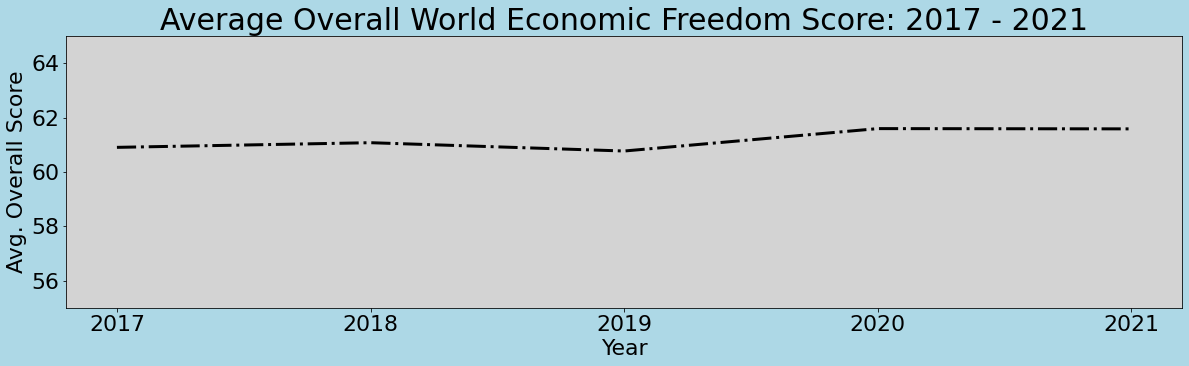

In [381]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

overallWorld_df = allData.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
overallWorld_df['Year'] = overallWorld_df['Year'].astype(str)

plt.plot('Year', 'Overall Score', data = overallWorld_df, linestyle = '-.', linewidth = 3.0,color = 'black')
plt.xlabel("Year")
plt.ylabel("Avg. Overall Score")
plt.title("Average Overall World Economic Freedom Score: 2017 - 2021", fontsize = 30)
plt.ylim((55,65))


From 2017 - 2021, we can see that the average world economic freedom score has consistently stayed between 60 and 62. There was a small dip in 2019 and a slight increase for 2020 and 2021.

Therefore, according to the freedom category classifications, the world as a whole has been classified as “Moderately Free” over the past 5 years.


(50.0, 75.0)

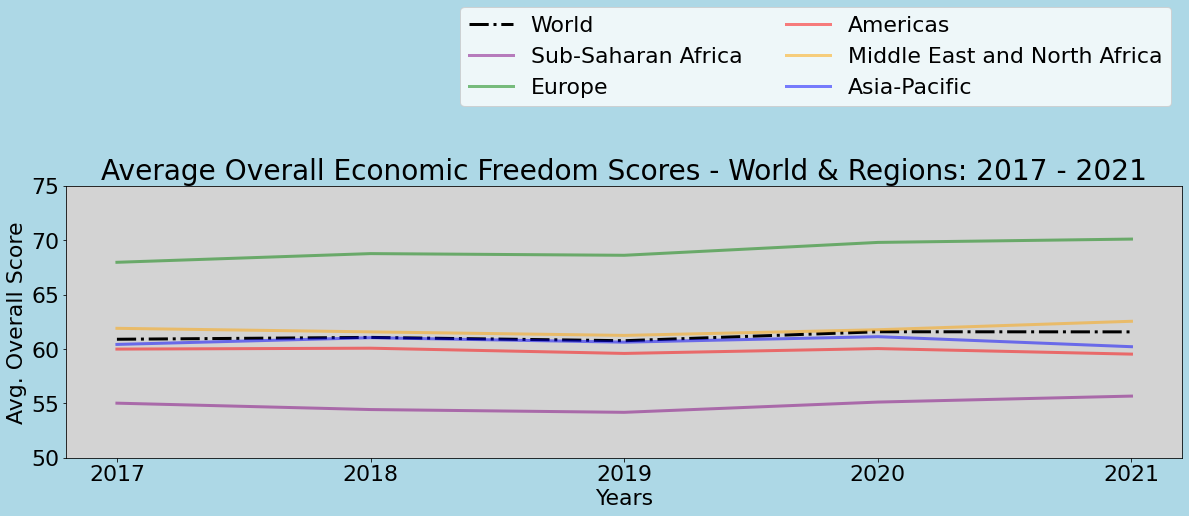

In [382]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")


overallWorld_df = allData.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
overallWorld_df['Year'] = overallWorld_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = overallWorld_df, label = 'World', linestyle = '-.', linewidth = 3.0,color = 'black')


SubAF_ScoreNew_df = allData[allData['Region']=="Sub-Saharan Africa"]
SubAF_Score_df = SubAF_ScoreNew_df.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
SubAF_Score_df['Year'] = SubAF_Score_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = SubAF_Score_df, label = 'Sub-Saharan Africa', linewidth = 3.0, color ='purple', alpha = 0.5)

EUR_ScoreNew_df = allData[allData['Region']=="Europe"]
EUR_Score_df = EUR_ScoreNew_df.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
EUR_Score_df['Year'] = EUR_Score_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = EUR_Score_df, label = "Europe", linewidth = 3.0, color = 'green', alpha = 0.5)

AMER_ScoreNew_df = allData[allData['Region']=="Americas"]
AMER_Score_df = AMER_ScoreNew_df.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
AMER_Score_df['Year'] = AMER_Score_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = AMER_Score_df, label = "Americas",linewidth = 3.0, color = 'red', alpha = 0.5)

MENA_ScoreNew_df = allData[allData['Region']=="Middle East and North Africa"]
MENA_Score_df = MENA_ScoreNew_df.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
MENA_Score_df['Year'] = MENA_Score_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = MENA_Score_df, label = "Middle East and North Africa",linewidth = 3.0, color = 'orange', alpha = 0.5)

APAC_ScoreNew_df = allData[allData['Region']=="Asia-Pacific"]
APAC_Score_df = APAC_ScoreNew_df.groupby('Year').agg({'Overall Score':'mean'}).reset_index()
APAC_Score_df['Year'] = APAC_Score_df['Year'].astype(str)
plt.plot('Year', 'Overall Score', data = APAC_Score_df, label = "Asia-Pacific", linewidth = 3.0, color = 'blue', alpha = 0.5)


plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avg. Overall Score")
plt.title("Average Overall Economic Freedom Scores - World & Regions: 2017 - 2021", fontsize = 28)
plt.ylim((50,75))
  

Adding each of the 5 regions [Asia-Pacific, Americas, Middle East and North Africa, Europe, & Sub-Saharan Africa] to the analysis yields the following results:

Europe has consistently scored above the world average for all 5 years. With scores ranging from 67 – 70,  Europe as a region has been classified as “Mostly Free” to “Moderately Free” each year.

Sub-Saharan Africa has consistently averaged a score of 55, which is below the world average. As a region, Sub-Saharan Africa has been classified as “Mostly Unfree” each year.

Asia-Pacific, the Middle East and North Africa, and the Americas have all clustered around the world average for all 5 years. With scores in the 60s, these 3 regions have consistently been classified as “Moderately Free” each year.

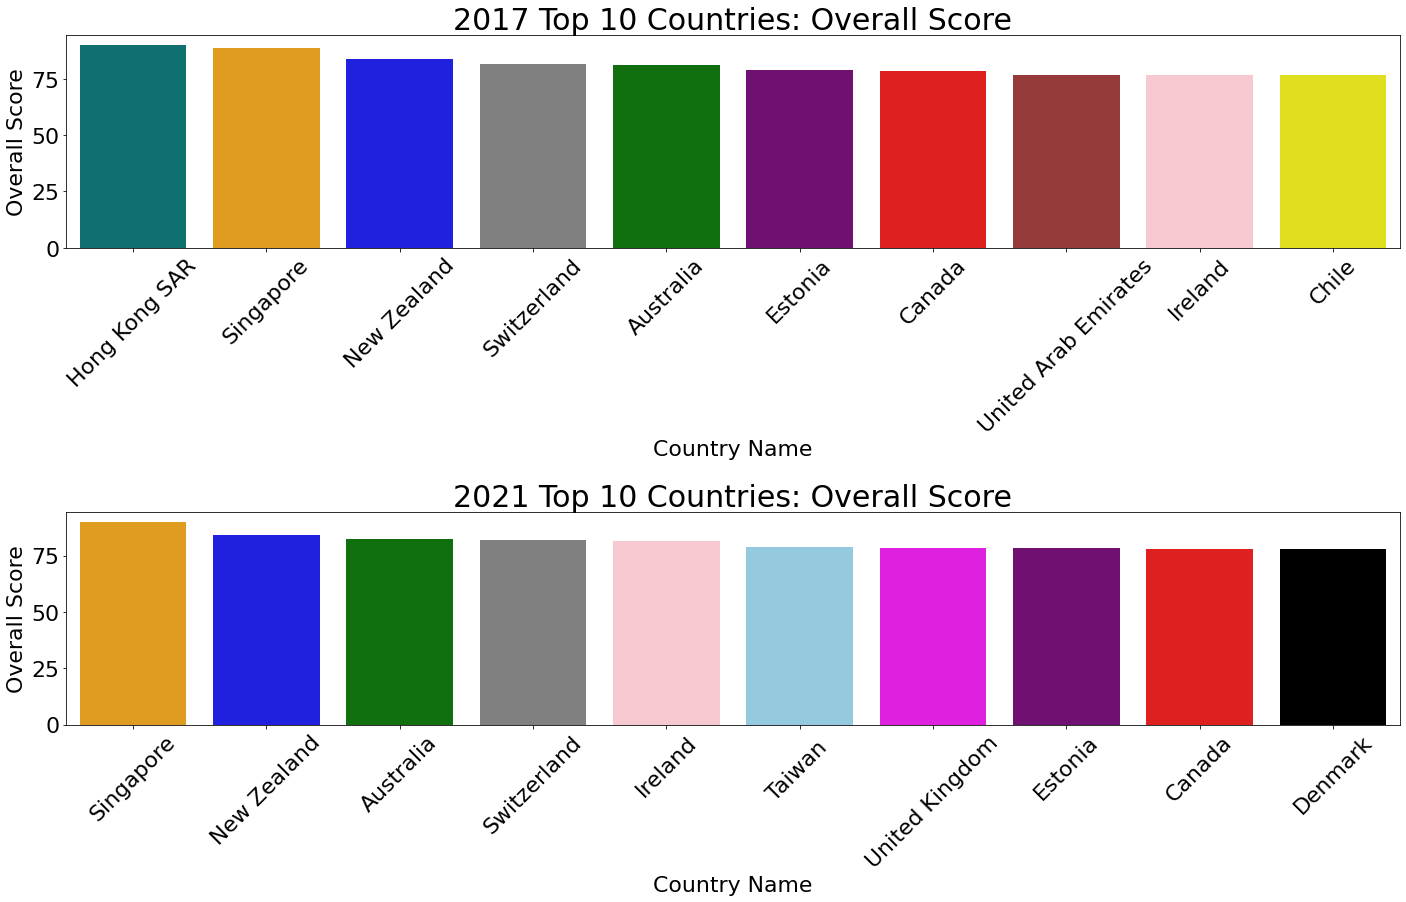

In [26]:

fig, ax = plt.subplots(2, figsize=(20,13))

colors1= ('teal','orange', 'blue', 'grey', 'green', 'purple', 'red', 'brown', 'pink', 'yellow')
top_10_17 = allData[allData['Year']==2017].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
top_10_17 = top_10_17.sort_values('Overall Score' ,ascending = False).head(10)
sns.barplot(ax=ax[0], x = 'Country Name', y='Overall Score', data = top_10_17, palette = colors1)
ax[0].set_title("2017 Top 10 Countries: Overall Score", fontsize = 30)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

colors2= ('orange','blue','green','grey','pink','skyblue', 'magenta','purple', 'red','black')
top_10_21 = allData[allData['Year']==2021].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
top_10_21 = top_10_21.sort_values('Overall Score' ,ascending = False).head(10)
sns.barplot(ax=ax[1], x = 'Country Name', y='Overall Score', data = top_10_21, palette = colors2)
ax[1].set_title("2021 Top 10 Countries: Overall Score", fontsize=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


fig.tight_layout()
plt.show()


7 of the top 10 countries in 2017 remained in the top 10 in 2021. 

Hong Kong was not included in the Index in 2021  because their government no longer exercised sovereign control of economic policies. 

The United Arab Emirates and Chile dropped out of the top 10 in 2021 but the United Kingdom, Taiwan, and Denmark all gained a spot in the top 10 countries by overall score.

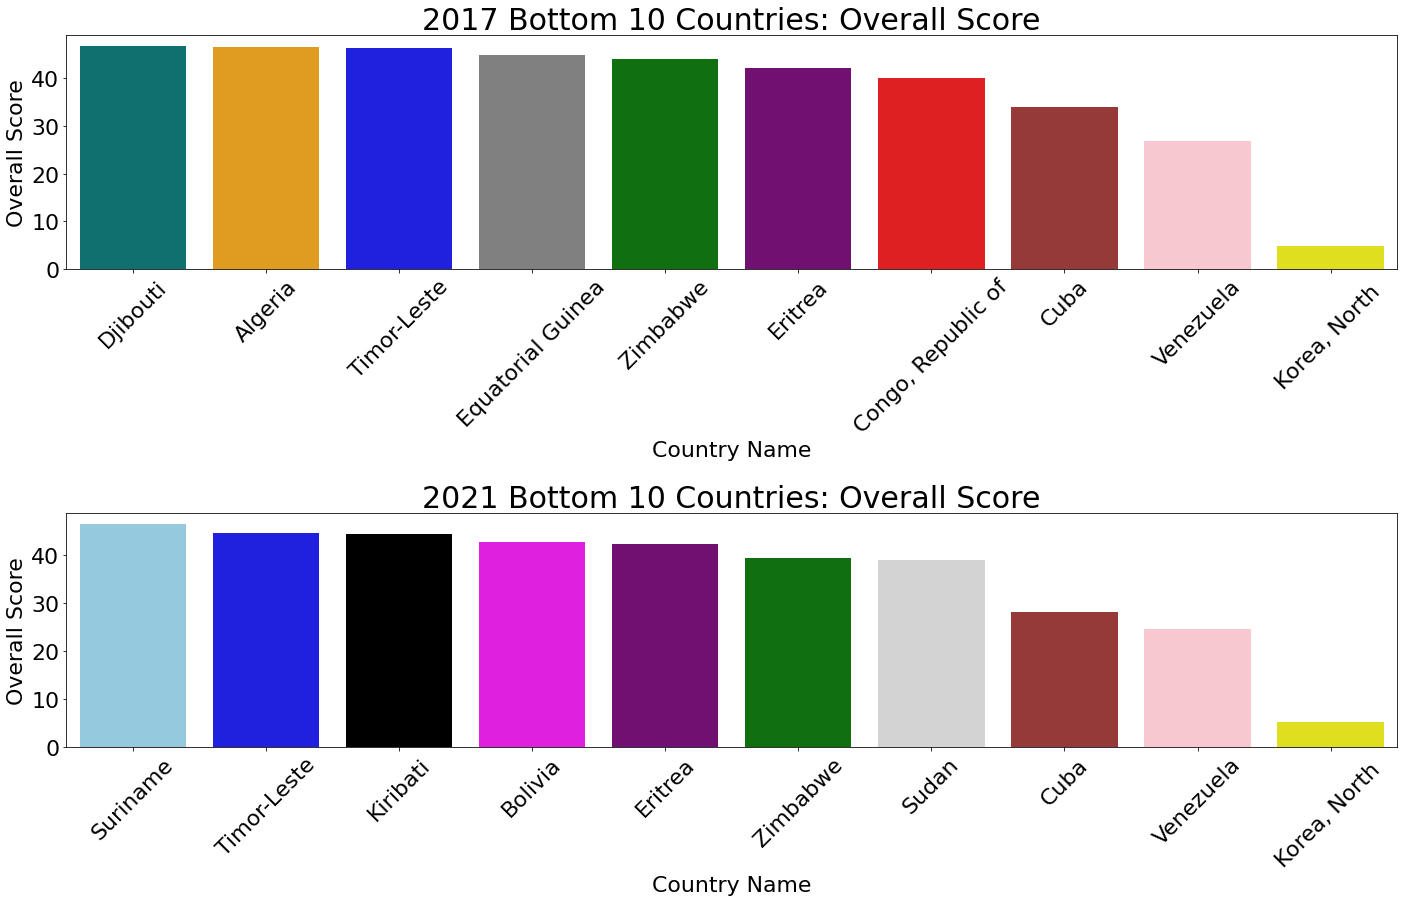

In [27]:
fig, ax = plt.subplots(2, figsize=(20,13))

colors1= ('teal','orange', 'blue', 'grey', 'green', 'purple', 'red', 'brown', 'pink', 'yellow')
bottom_10_17 = allData[allData['Year']==2017].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
bottom_10_17 = bottom_10_17.sort_values('Overall Score').head(10)
bottom_10_17 = bottom_10_17.sort_values('Overall Score' ,ascending = False)
sns.barplot(ax=ax[0], x = 'Country Name', y='Overall Score', data = bottom_10_17, palette = colors1)
ax[0].set_title("2017 Bottom 10 Countries: Overall Score", fontsize = 30)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

colors2= ('skyblue','blue', 'black', 'magenta', 'purple','green','lightgrey', 'brown', 'pink', 'yellow')
bottom_10_21 = allData[allData['Year']==2021].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
bottom_10_21 = bottom_10_21.sort_values('Overall Score').head(10)
bottom_10_21 = bottom_10_21.sort_values('Overall Score' ,ascending = False)
sns.barplot(ax=ax[1], x = 'Country Name', y='Overall Score', data = bottom_10_21, palette = colors2)
ax[1].set_title("2021 Bottom 10 Countries: Overall Score", fontsize=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()

The 6 countries of Timor-Leste, Zimbabwe, Eritrea, Cuba, Venezuela, and North Korea were in the bottom 10 in 2017 and remained in the bottom 10 in 2021. Dijbouti, Algeria, Equatorial Guinea, and the Republic of Congo managed to improve their overall scores since 2017. 

Bolivia and Kiribati's overall scores fell from 2017 - 2021.

### Rule of Law, Government Size, Regulatory Efficiency, Open Markets 

 In addition to a country's overall score, the Economic Freedom Index focuses on four key aspects of the economic and entrepreneurial environment where governments typically exercise policy control. The 12 subcomponents that make up the overall score are averaged and grouped together in the following 4 categories:
 
1. Rule of Law (property rights, government integrity, judicial effectiveness)

2. Government Size (government spending, tax burden, fiscal health)

3. Regulatory Efficiency (business freedom, labor freedom, monetary freedom)

4. Open Markets (trade freedom, investment freedom, financial freedom) 


(20.0, 75.0)

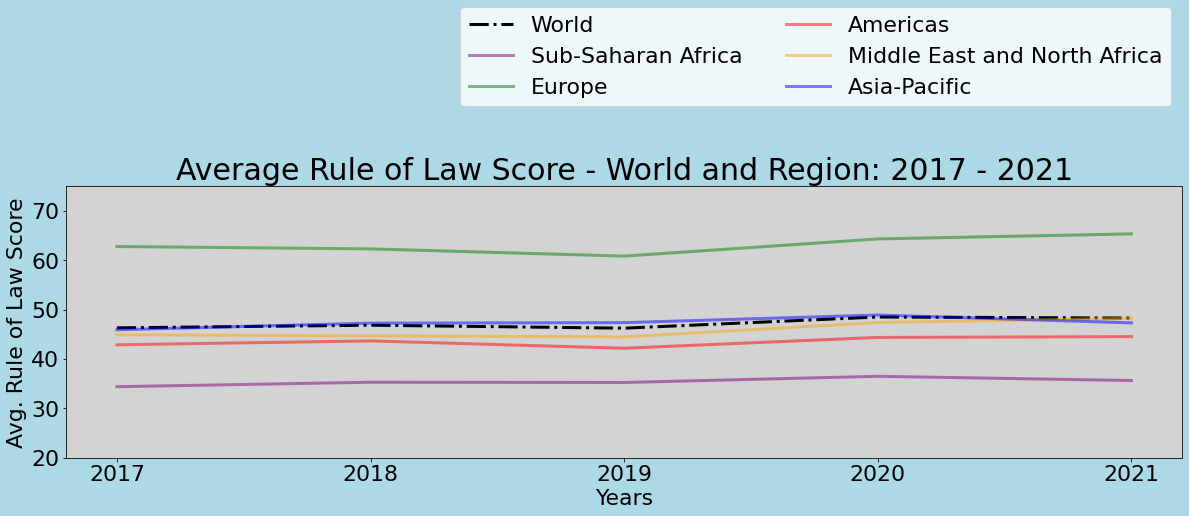

In [383]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")


RolWorld_df = allData.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
RolWorld_df['Year'] = RolWorld_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = RolWorld_df, label = 'World', linestyle = '-.', linewidth = 3.0,color = 'black')


SubAF_RolNew_df = allData[allData['Region']=="Sub-Saharan Africa"]
SubAF_Rol_df = SubAF_RolNew_df.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
SubAF_Rol_df['Year'] = SubAF_Rol_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = SubAF_Rol_df, label = 'Sub-Saharan Africa', linewidth = 3.0, color ='purple', alpha = 0.5)

EUR_RolNew_df = allData[allData['Region']=="Europe"]
EUR_Rol_df = EUR_RolNew_df.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
EUR_Rol_df['Year'] = EUR_Rol_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = EUR_Rol_df, label = "Europe", linewidth = 3.0, color = 'green', alpha = 0.5)

AMER_RolNew_df = allData[allData['Region']=="Americas"]
AMER_Rol_df = AMER_RolNew_df.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
AMER_Rol_df['Year'] = AMER_Rol_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = AMER_Rol_df, label = "Americas",linewidth = 3.0, color = 'red', alpha = 0.5)

MENA_RolNew_df = allData[allData['Region']=="Middle East and North Africa"]
MENA_Rol_df = MENA_RolNew_df.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
MENA_Rol_df['Year'] = MENA_Rol_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = MENA_Rol_df, label = "Middle East and North Africa",linewidth = 3.0, color = 'orange', alpha = 0.5)

APAC_RolNew_df = allData[allData['Region']=="Asia-Pacific"]
APAC_Rol_df = APAC_RolNew_df.groupby('Year').agg({'Rule of Law':'mean'}).reset_index()
APAC_Rol_df['Year'] = APAC_Rol_df['Year'].astype(str)
plt.plot('Year', 'Rule of Law', data = APAC_Rol_df, label = "Asia-Pacific", linewidth = 3.0, color = 'blue', alpha = 0.5)


plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avg. Rule of Law Score")
plt.title("Average Rule of Law Score - World and Region: 2017 - 2021", fontsize = 30)
plt.ylim((20,75))



From 2017-2021, Europe consistently had the highest Rule of Law score while the Americas and Sub-Saharan Africa had the lowest scores. 

The remaining regions hovered around the world overall average Rule of Law score.

(50.0, 80.0)

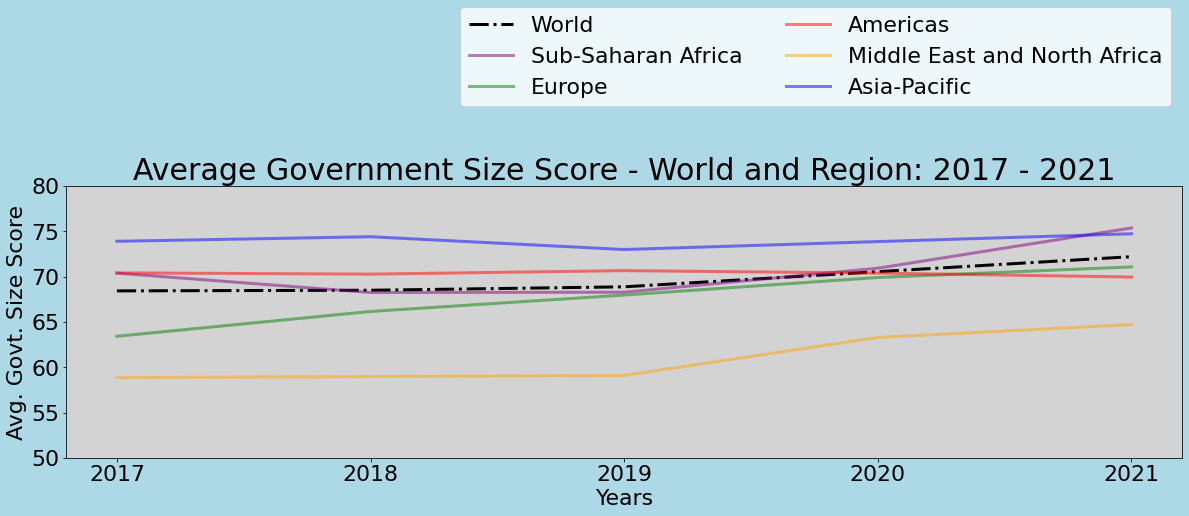

In [384]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")


GsWorld_df = allData.groupby('Year').agg({'Government Size':'mean'}).reset_index()
GsWorld_df['Year'] = GsWorld_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = GsWorld_df, label = 'World', linestyle = '-.', linewidth = 3.0,color = 'black')


SubAF_GsNew_df = allData[allData['Region']=="Sub-Saharan Africa"]
SubAF_Gs_df = SubAF_GsNew_df.groupby('Year').agg({'Government Size':'mean'}).reset_index()
SubAF_Gs_df['Year'] = SubAF_Gs_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = SubAF_Gs_df, label = 'Sub-Saharan Africa', linewidth = 3.0, color ='purple', alpha = 0.5)

EUR_GsNew_df = allData[allData['Region']=="Europe"]
EUR_Gs_df = EUR_GsNew_df.groupby('Year').agg({'Government Size':'mean'}).reset_index()
EUR_Gs_df['Year'] = EUR_Gs_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = EUR_Gs_df, label = "Europe", linewidth = 3.0, color = 'green', alpha = 0.5)

AMER_GsNew_df = allData[allData['Region']=="Americas"]
AMER_Gs_df = AMER_GsNew_df.groupby('Year').agg({'Government Size':'mean'}).reset_index()
AMER_Gs_df['Year'] = AMER_Gs_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = AMER_Gs_df, label = "Americas",linewidth = 3.0, color = 'red', alpha = 0.5)

MENA_GsNew_df = allData[allData['Region']=="Middle East and North Africa"]
MENA_Gs_df = MENA_GsNew_df.groupby('Year').agg({'Government Size':'mean'}).reset_index()
MENA_Gs_df['Year'] = MENA_Gs_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = MENA_Gs_df, label = "Middle East and North Africa",linewidth = 3.0, color = 'orange', alpha = 0.5)

APAC_GsNew_df = allData[allData['Region']=="Asia-Pacific"]
APAC_Gs_df = APAC_GsNew_df.groupby('Year').agg({'Government Size':'mean'}).reset_index()
APAC_Gs_df['Year'] = APAC_Gs_df['Year'].astype(str)
plt.plot('Year', 'Government Size', data = APAC_Gs_df, label = "Asia-Pacific", linewidth = 3.0, color = 'blue', alpha = 0.5)


plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avg. Govt. Size Score")
plt.title("Average Government Size Score - World and Region: 2017 - 2021", fontsize = 30)
plt.ylim((50,80))

Average government size has been on the rise for several regions.

Of all regions, Asia-Pacific has consistently had the largest government size over the stated 5 year period while the Middle East and North Africa has had the smallest government size. However, the Middle East and North Africa saw an increase in its government size starting in 2019. 

Europe had the second lowest government size score in 2017, but has seen an upwards trend since then.

In 2020, Sub-Saharan Africa saw an increase in its government size.

The Americas government size has remained relatively flat. 


(55.0, 75.0)

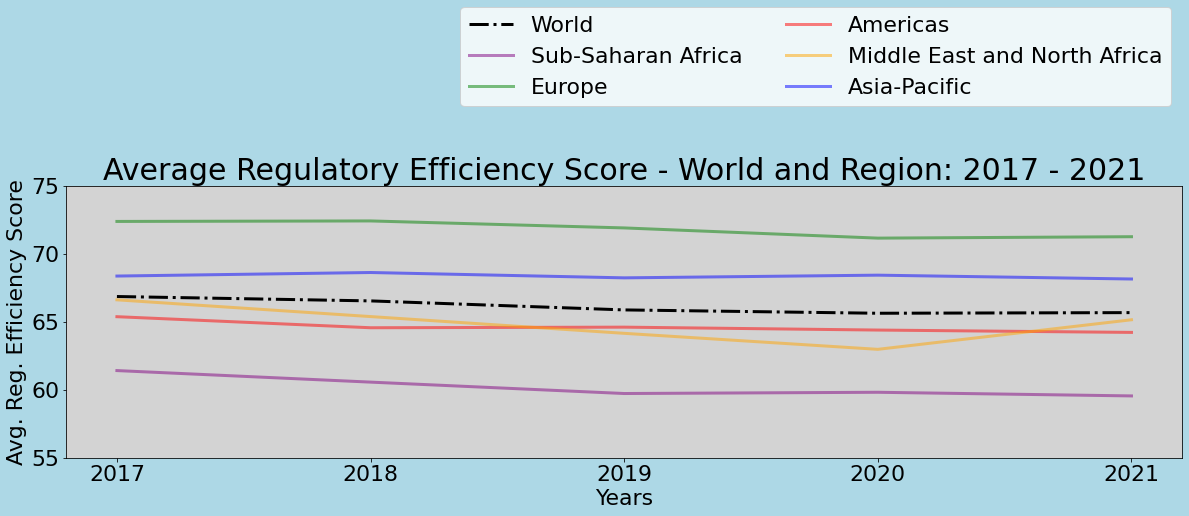

In [385]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")


ReWorld_df = allData.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
ReWorld_df['Year'] = ReWorld_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = ReWorld_df, label = 'World', linestyle = '-.', linewidth = 3.0,color = 'black')


SubAF_ReNew_df = allData[allData['Region']=="Sub-Saharan Africa"]
SubAF_Re_df = SubAF_ReNew_df.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
SubAF_Re_df['Year'] = SubAF_Re_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = SubAF_Re_df, label = 'Sub-Saharan Africa', linewidth = 3.0, color ='purple', alpha = 0.5)

EUR_ReNew_df = allData[allData['Region']=="Europe"]
EUR_Re_df = EUR_ReNew_df.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
EUR_Re_df['Year'] = EUR_Re_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = EUR_Re_df, label = "Europe", linewidth = 3.0, color = 'green', alpha = 0.5)

AMER_ReNew_df = allData[allData['Region']=="Americas"]
AMER_Re_df = AMER_ReNew_df.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
AMER_Re_df['Year'] = AMER_Re_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = AMER_Re_df, label = "Americas",linewidth = 3.0, color = 'red', alpha = 0.5)

MENA_ReNew_df = allData[allData['Region']=="Middle East and North Africa"]
MENA_Re_df = MENA_ReNew_df.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
MENA_Re_df['Year'] = MENA_Re_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = MENA_Re_df, label = "Middle East and North Africa",linewidth = 3.0, color = 'orange', alpha = 0.5)

APAC_ReNew_df = allData[allData['Region']=="Asia-Pacific"]
APAC_Re_df = APAC_ReNew_df.groupby('Year').agg({'Regulatory Efficiency':'mean'}).reset_index()
APAC_Re_df['Year'] = APAC_Re_df['Year'].astype(str)
plt.plot('Year', 'Regulatory Efficiency', data = APAC_Re_df, label = "Asia-Pacific", linewidth = 3.0, color = 'blue', alpha = 0.5)


plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avg. Reg. Efficiency Score")
plt.title("Average Regulatory Efficiency Score - World and Region: 2017 - 2021", fontsize = 30)
plt.ylim((55,75))



Regulatory Efficiency has remained relatively flat for the Americas and Asia-Pacific from 2017 - 2020. 

The Middle East and North Africa's Regulatory Efficiency score declined from 2017 to 2020, but then saw a slight increase.

Europe and Sub-Saharan Africa have seen slight declines in their scores since 2017.


(40.0, 80.0)

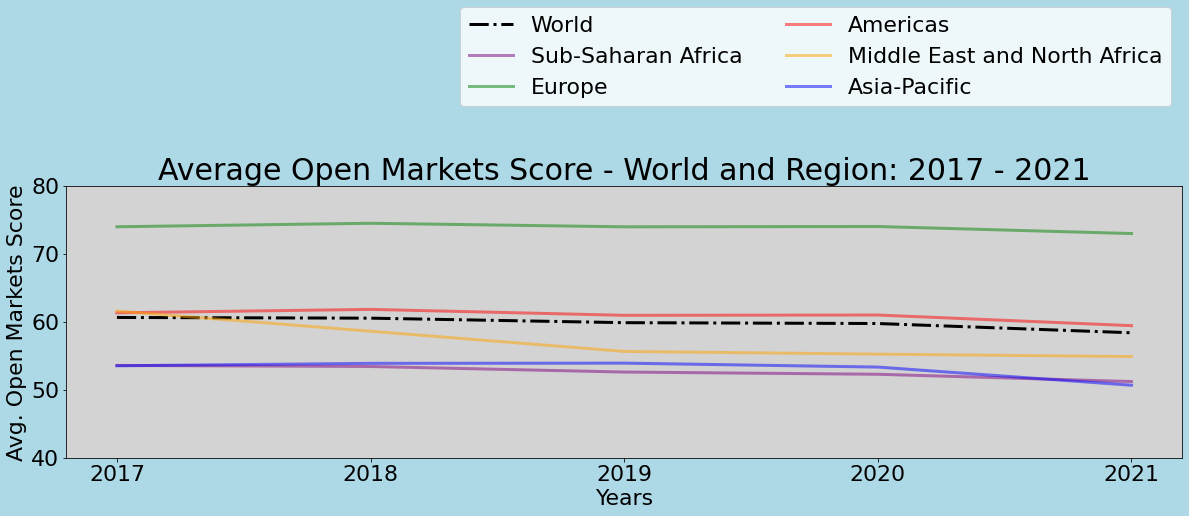

In [386]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")


OmWorld_df = allData.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
OmWorld_df['Year'] = OmWorld_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = OmWorld_df, label = 'World', linestyle = '-.', linewidth = 3.0,color = 'black')


SubAF_OmNew_df = allData[allData['Region']=="Sub-Saharan Africa"]
SubAF_Om_df = SubAF_OmNew_df.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
SubAF_Om_df['Year'] = SubAF_Om_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = SubAF_Om_df, label = 'Sub-Saharan Africa', linewidth = 3.0, color ='purple', alpha = 0.5)

EUR_OmNew_df = allData[allData['Region']=="Europe"]
EUR_Om_df = EUR_OmNew_df.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
EUR_Om_df['Year'] = EUR_Om_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = EUR_Om_df, label = "Europe", linewidth = 3.0, color = 'green', alpha = 0.5)

AMER_OmNew_df = allData[allData['Region']=="Americas"]
AMER_Om_df = AMER_OmNew_df.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
AMER_Om_df['Year'] = AMER_Om_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = AMER_Om_df, label = "Americas",linewidth = 3.0, color = 'red', alpha = 0.5)

MENA_OmNew_df = allData[allData['Region']=="Middle East and North Africa"]
MENA_Om_df = MENA_OmNew_df.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
MENA_Om_df['Year'] = MENA_Om_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = MENA_Om_df, label = "Middle East and North Africa",linewidth = 3.0, color = 'orange', alpha = 0.5)

APAC_OmNew_df = allData[allData['Region']=="Asia-Pacific"]
APAC_Om_df = APAC_OmNew_df.groupby('Year').agg({'Open Markets':'mean'}).reset_index()
APAC_Om_df['Year'] = APAC_Om_df['Year'].astype(str)
plt.plot('Year', 'Open Markets', data = APAC_Om_df, label = "Asia-Pacific", linewidth = 3.0, color = 'blue', alpha = 0.5)


plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avg. Open Markets Score")
plt.title("Average Open Markets Score - World and Region: 2017 - 2021", fontsize = 30)
plt.ylim((40,80))


Europe has had the highest Open Market score of all regions from 2017 - 2021, whereas Asia-Pacific and Sub-Saharan Africa have had the lowest.

The Middle East and North Africa Open Market score has declined steadily from 2018.


## Statistical Analysis

### Scatter Plots

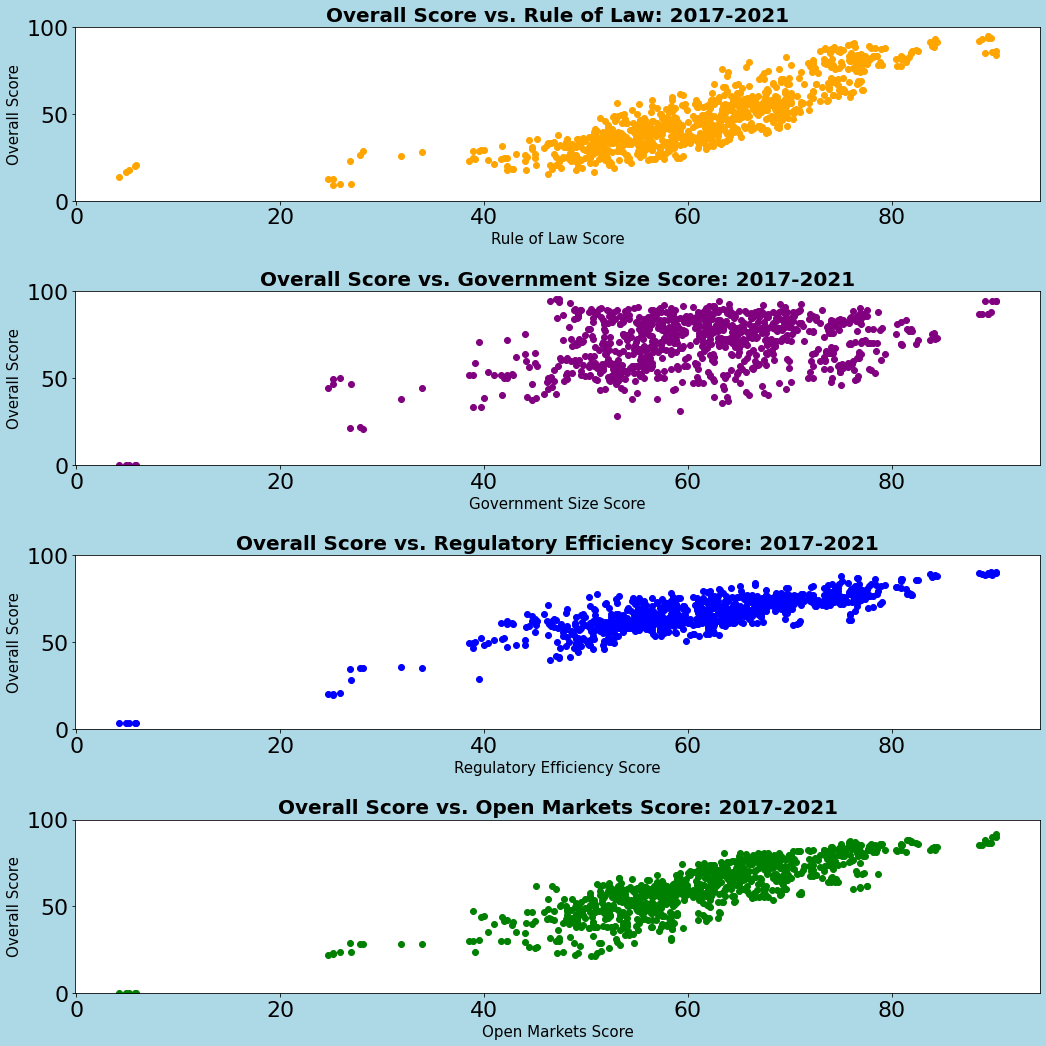

In [421]:
fig, (axs0, axs1, axs2, axs3) = plt.subplots(4)
plt.rcParams["figure.facecolor"] = "lightblue"
#ax = plt.axes()
ax.set_facecolor("lightgrey")
fig.set_figheight(15)
fig.set_figwidth(15)

#Worldconsolidated = pd.concat([overallWorld_df, RolWorld_df, GsWorld_df, ReWorld_df, OmWorld_df]).reset_index(drop=True)
axs0.scatter(x=allData['Overall Score'], y=allData['Rule of Law'],color = 'orange')
axs0.set_xlabel("Rule of Law Score", fontsize=15)
axs0.set_ylabel("Overall Score", fontsize = 15)
axs0.set_title("Overall Score vs. Rule of Law: 2017-2021", fontsize = 20, fontweight='bold')
axs0.set_ylim([0,100])

axs1.scatter(x=allData['Overall Score'],y=allData['Government Size'],color = 'purple')
axs1.set_xlabel("Government Size Score", fontsize=15)
axs1.set_ylabel("Overall Score", fontsize=15)
axs1.set_title("Overall Score vs. Government Size Score: 2017-2021", fontsize = 20, fontweight='bold')
axs1.set_ylim([0,100])

axs2.scatter(x=allData['Overall Score'],y=allData['Regulatory Efficiency'], color = 'blue')
axs2.set_xlabel("Regulatory Efficiency Score", fontsize=15)
axs2.set_ylabel("Overall Score", fontsize=15)
axs2.set_title("Overall Score vs. Regulatory Efficiency Score: 2017-2021", fontsize = 20, fontweight='bold')
axs2.set_ylim([0,100])

axs3.scatter(x=allData['Overall Score'],y=allData['Open Markets'], color = 'green')
axs3.set_xlabel("Open Markets Score", fontsize=15)
axs3.set_ylabel("Overall Score", fontsize=15)
axs3.set_title("Overall Score vs. Open Markets Score: 2017-2021", fontsize = 20, fontweight='bold')
axs3.set_ylim([0,100])

fig.tight_layout()

The above scatter plots show a positive correlation between a country's Rule of Law, Government Size, Open Markets, and Regulatory Efficiency scores, indicating that as these scores improve, the overall score improves and may potentially lead to more economic freedom. Government Size shows a slightly flatter trend, indicating that this variable may not be as strongly positively correlated as the other 3.



### Correlation

<AxesSubplot:>

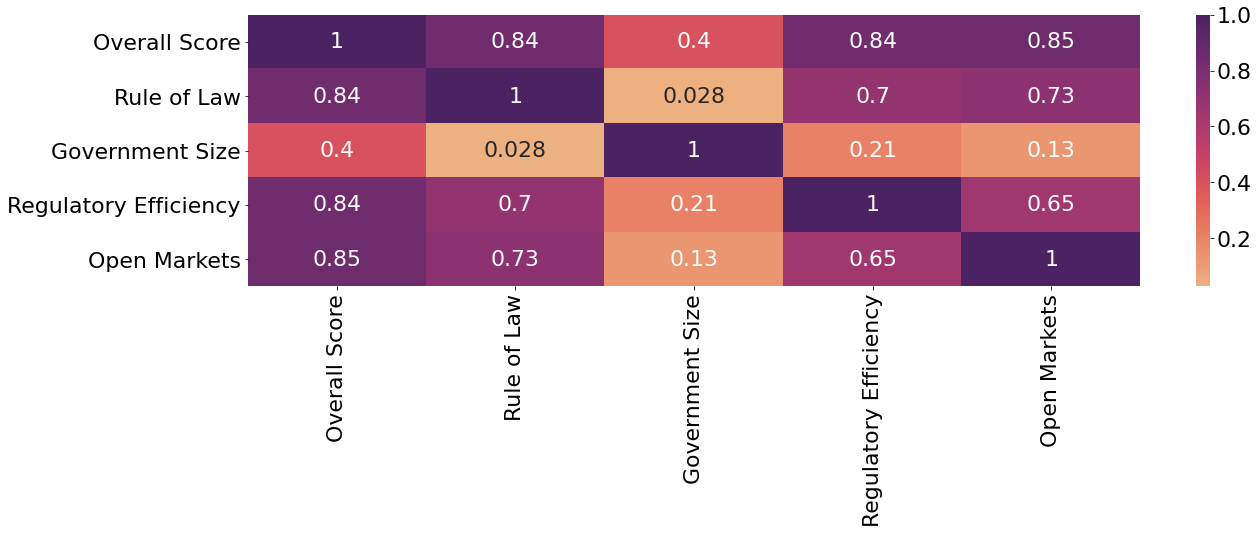

In [50]:

df_corr = allData[['Country Name', 'Overall Score', 'Rule of Law', 
                              'Government Size', 'Regulatory Efficiency', 'Open Markets']].copy(deep = True)
corr_df_corr = df_corr.corr()

sns.heatmap(corr_df_corr, annot=True, cmap="flare")

The Rule of Law, Regulatory Efficiency, and Open Markets r-squared values indicate that these variables are strongly, positively correlated with a country's improved overall economic freedom. Government Size is still positively correlated with overall score, but less so than the other 3 variables.

### Percentage increase / decrease

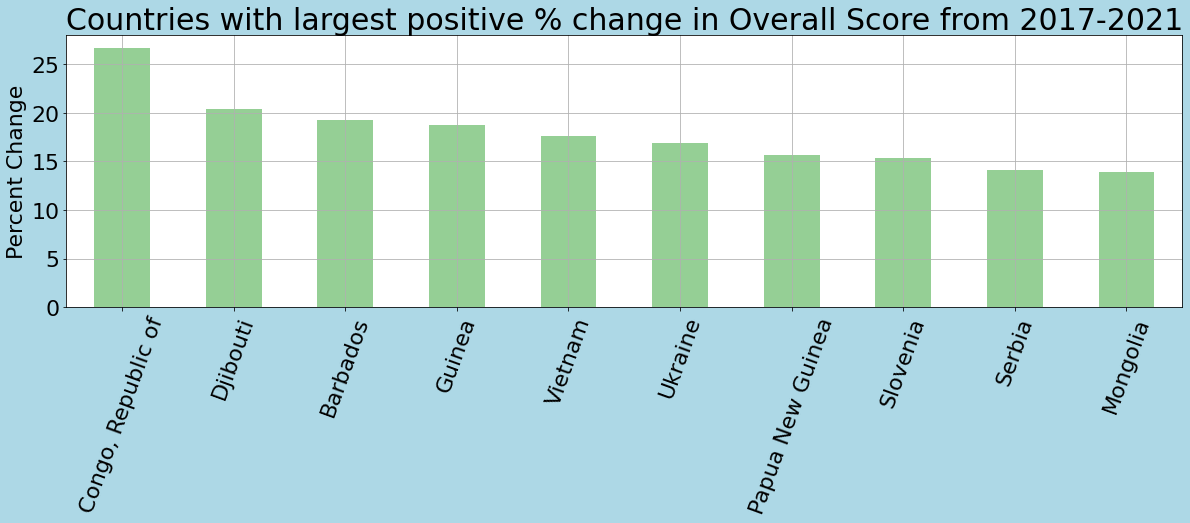

In [517]:
perChng_17 = allData[allData['Year']==2017].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
perChng_21 = allData[allData['Year']==2021].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()

perChng = pd.concat([perChng_17, perChng_21]).reset_index(drop=True)

perChange = perChng.groupby('Country Name',sort=False).apply(lambda x: (x['Overall Score'].values[-1] - x['Overall Score'].values[0]) / x['Overall Score'].values[0] * 100)\
    .reset_index(name=('Percent Change'))


perChange = perChange.sort_values('Percent Change', ascending = False).head(10)
perChange.plot('Country Name', 'Percent Change', kind = 'bar', rot=70, legend=None, alpha=0.5, color = 'tab:green')
plt.xlabel('')
plt.ylabel("Percent Change")
plt.title("Countries with largest positive % change in Overall Score from 2017-2021", fontsize=30)
plt.grid()


The Republic of Congo saw the largest increase in their overall score from 40 in 2017 to 50.7 in 2021. This percent increase also meant that the country moved from being classified as 'Repressed' to 'Mostly Unfree.'
The country improved their world rank from 177 in 2017 to 156 in 2020. Additionally, the country gained 10 positions in their region rank (Sub-Saharan Africa) going from 47 to 37.

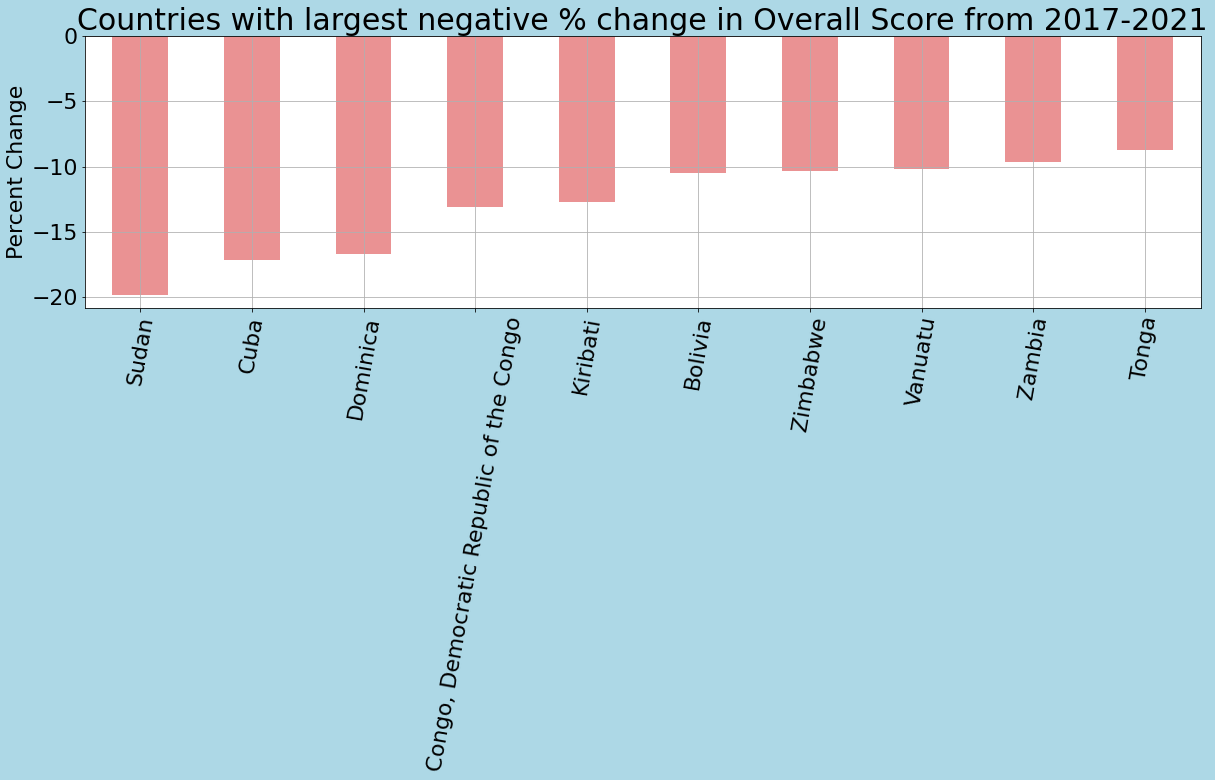

In [515]:
perChng_17 = allData[allData['Year']==2017].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()
perChng_21 = allData[allData['Year']==2021].groupby(by =['Country Name'])['Overall Score'].mean().reset_index()

perChng = pd.concat([perChng_17, perChng_21]).reset_index(drop=True)

perChange = perChng.groupby('Country Name',sort=False).apply(lambda x: (x['Overall Score'].values[-1] - x['Overall Score'].values[0]) / x['Overall Score'].values[0] * 100)\
    .reset_index(name=('Percent Change'))


perChange = perChange.sort_values('Percent Change').head(10)
perChange.plot('Country Name', 'Percent Change', kind = 'bar', rot=80, legend=None, alpha=0.5, color = 'tab:red')
plt.xlabel('')
plt.ylabel("Percent Change")
plt.title("Countries with largest negative % change in Overall Score from 2017-2021", fontsize=30)
plt.grid()

Sudan saw the largest decrease in their overall score from 48.8 in 2017 to 39.1 in 2021. The country remained categorized as 'Repressed.' Sudan's world rank also decreased from 164 in 2017 to 175 in 2021 and their region rank (Sub-Saharan Africa) decreased from 40 in 2017 to 47 in 2021.

## Regional Analysis

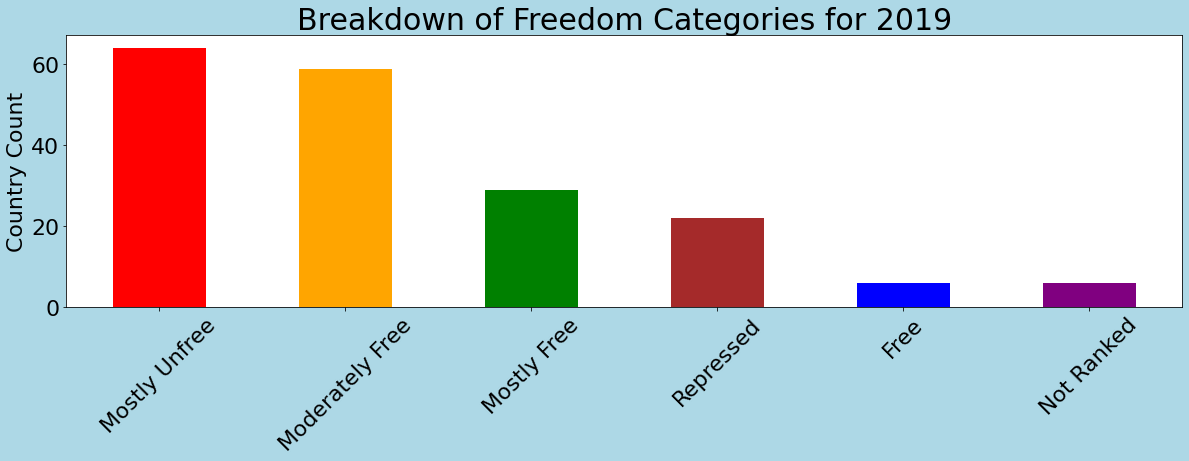

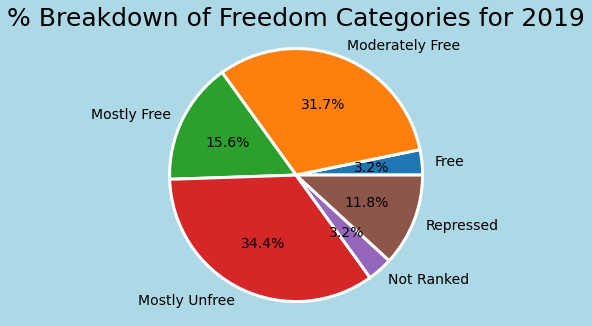

In [390]:
plt.rcParams["figure.facecolor"] = "lightblue"

FreeCats = df19.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
FreeCats = FreeCats.sort_values('CountryID', ascending = False)
FreeCats.plot.bar('Bucket Category', 'CountryID', rot=45, legend = None,color = ('Red', 'Orange', 'Green','Brown','Blue','Purple'))
plt.xlabel('')
plt.ylabel("Country Count")
plt.title("Breakdown of Freedom Categories for 2019", fontsize=30)

labels = ['Free','Moderately Free','Mostly Free','Mostly Unfree','Not Ranked','Repressed']
FreeCats = df19.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
FreeCats.plot.pie(y = 'CountryID', labels = labels,legend = None, fontsize = 14,autopct='%.1f%%',radius = 1.1, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
plt.title("% Breakdown of Freedom Categories for 2019", fontsize=25)
plt.ylabel('')

plt.tight_layout()

Taking the pre-Covid year of 2019 as an example year, approximately 66% of countries were classified as either “Mostly Unfree” (34.4%) or “Moderately Free” (31.7%). 

On the other hand, only 3.2% of countries were classified as “Free” and 11.8% of countries were classified as “Repressed.” This indicates that the majority of countries are not at the extreme ends being completely free or completely repressed, but fall somewhere in the middle, with a slight lean towards being more unfree than free.


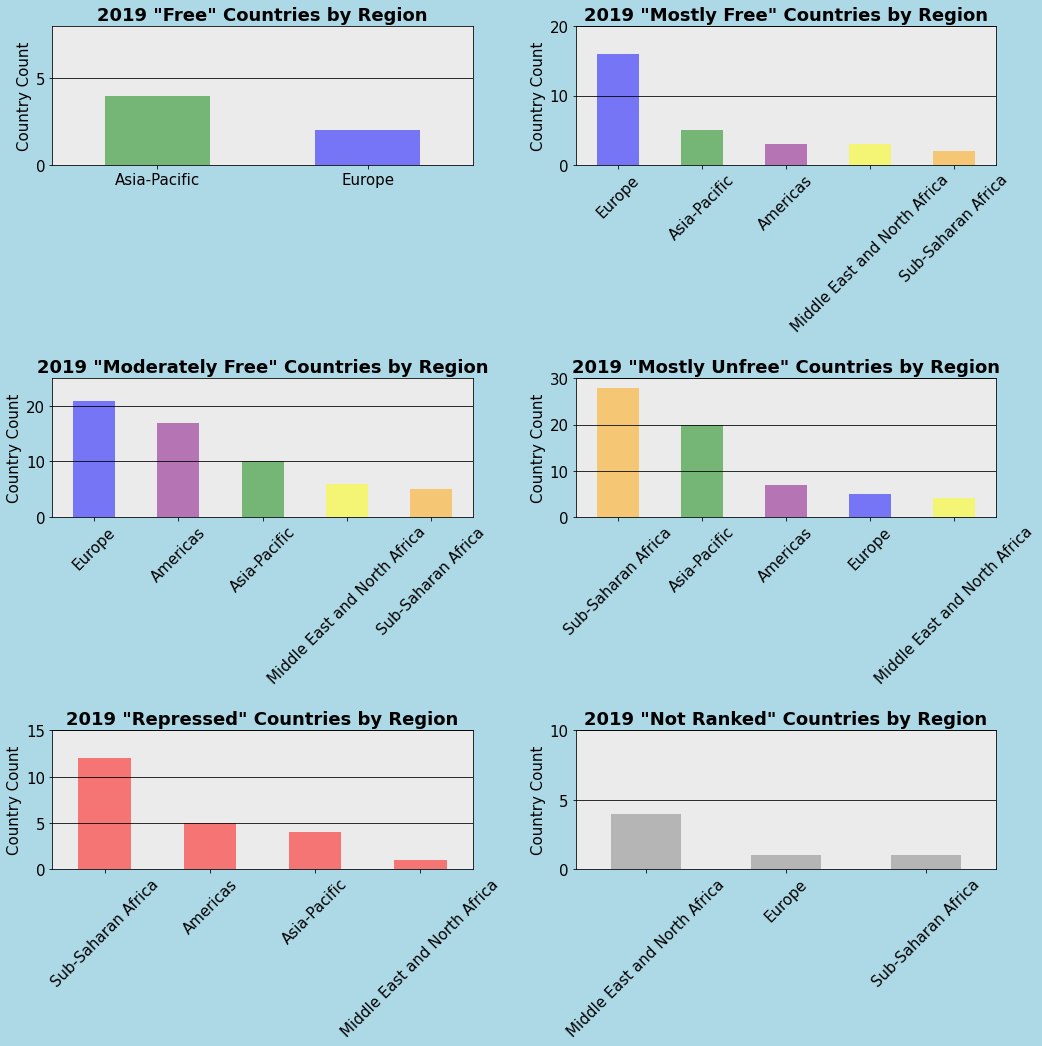

In [373]:
fig, ((axs1, axs2), (axs3, axs4), (axs5, axs6)) = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["figure.facecolor"] = "lightblue"

Free_newCat_df = df19[df19['Bucket Category']=="Free"]
FreeCat_df = Free_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
FreeCat_sorted = FreeCat_df.sort_values('CountryID', ascending = False)
FreeCat_sorted.plot('Region', 'CountryID',kind = 'bar', ax=axs1, rot=0,fontsize = 15,legend = None, alpha = 0.5, color = ('green', 'blue'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("2019 " '"Free"' " Countries by Region", fontsize = 18, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 8])

MosFree_newCat_df = df19[df19['Bucket Category']=="Mostly Free"]
MosFree_df = MosFree_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
MosFree_sorted = MosFree_df.sort_values('CountryID', ascending = False)
MosFree_sorted.plot('Region', 'CountryID', kind = 'bar', ax=axs2, rot=45, fontsize = 15,legend = None, alpha = 0.5, color =('blue', 'green', 'purple', 'yellow', 'orange'))
axs2.set_xlabel('')
axs2.set_ylabel("Country Count", fontsize = 15)
axs2.set_title("2019 " '"Mostly Free"' " Countries by Region", fontsize = 18, fontweight='bold')
axs2.set_facecolor('#EBEBEB')
axs2.yaxis.grid(True, which='major', color = 'black')
axs2.yaxis.grid(True, which='minor', color = 'black')
axs2.set_ylim([0, 20])

ModFree_newCat_df = df19[df19['Bucket Category']=="Moderately Free"]
ModFree_df = ModFree_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
ModFree_sorted = ModFree_df.sort_values('CountryID', ascending = False)
ModFree_sorted.plot('Region', 'CountryID', rot=45, kind = 'bar', ax=axs3, fontsize = 15,legend = None, alpha = 0.5, color =('blue', 'purple','green','yellow', 'orange'))
axs3.set_xlabel('')
axs3.set_ylabel("Country Count", fontsize = 15)
axs3.set_title("2019 " '"Moderately Free"'" Countries by Region", fontsize = 18, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'black')
axs3.yaxis.grid(True, which='minor', color = 'black')
axs3.set_ylim([0, 25])

MosUnfree_newCat_df = df19[df19['Bucket Category']=="Mostly Unfree"]
MosUnfree_df = MosUnfree_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
MosUnfree_sorted = MosUnfree_df.sort_values('CountryID', ascending = False)
MosUnfree_sorted.plot('Region', 'CountryID', rot=45, kind='bar', ax=axs4,fontsize = 15, legend = None, alpha = 0.5, color =('orange','green','purple','blue','yellow'))
axs4.set_xlabel('')
axs4.set_ylabel("Country Count", fontsize = 15)
axs4.set_title("2019 " '"Mostly Unfree"' " Countries by Region", fontsize = 18, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'black')
axs4.yaxis.grid(True, which='minor', color = 'black')
axs4.set_ylim([0, 30])

Rep_newCat_df = df19[df19['Bucket Category']=="Repressed"]
Rep_df = Rep_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
Rep_sorted = Rep_df.sort_values('CountryID', ascending = False)
Rep_sorted.plot('Region', 'CountryID', rot=45, kind='bar', ax=axs5, fontsize=15, legend = None, alpha = 0.5, color= 'red')
axs5.set_xlabel('')
axs5.set_ylabel("Country Count", fontsize = 15)
axs5.set_title("2019 " '"Repressed"' " Countries by Region", fontsize = 18, fontweight='bold')
axs5.set_facecolor('#EBEBEB')
axs5.yaxis.grid(True, which='major', color = 'black')
axs5.yaxis.grid(True, which='minor', color = 'black')
axs5.set_ylim([0,15])

NotRank_newCat_df = df19[df19['Bucket Category']=="Not Ranked"]
NotRank_df = NotRank_newCat_df.groupby('Region').agg({'CountryID':'count'}).reset_index()
NotRank_sorted = NotRank_df.sort_values('CountryID', ascending = False)
NotRank_sorted.plot('Region', 'CountryID', rot=45, kind='bar', ax=axs6, fontsize=15, legend = None, alpha = 0.5, color='grey')
axs6.set_xlabel('')
axs6.set_ylabel("Country Count", fontsize = 15)
axs6.set_title("2019 " '"Not Ranked"' " Countries by Region", fontsize = 18, fontweight='bold')
axs6.set_facecolor('#EBEBEB')
axs6.yaxis.grid(True, which='major', color = 'black')
axs6.yaxis.grid(True, which='minor', color = 'black')
axs6.set_ylim([0,10])

plt.tight_layout()

“Free”: Asia-Pacific and Europe were the only 2 regions to include any of the 3.2% of countries classified as “Free”. 

“Mostly Free”: Europe had 3 times as many countries classified as “Mostly Free” as the 2nd highest region, Asia-Pacific.

“Moderately Free”: Europe again had the most countries classified as “Moderately Free” followed closely by the Americas.

“Mostly Unfree”: Approximately 58% of Sub-Saharan African countries were classified as “Mostly Unfree” followed by Asia-Pacific at 48%.

“Repressed”: Sub-Saharan Africa had more than double the countries categorized as “Repressed” as the next highest region, the Americas.

The Middle East and North Africa had the most countries where there was not enough data to provide an appropriate score or rank.

### Sub-Saharan Africa 

(20.0, 80.0)

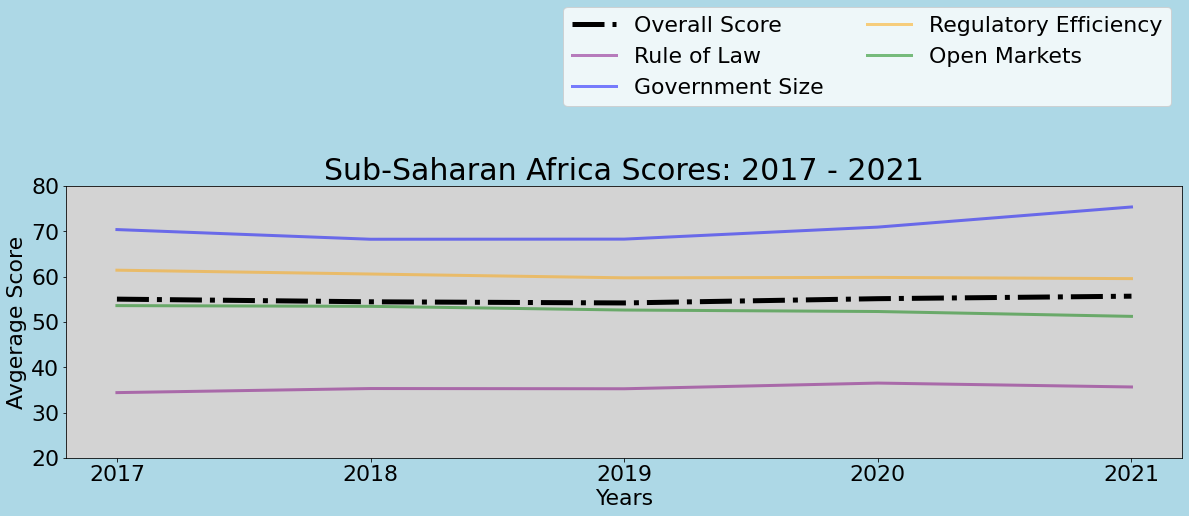

In [372]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

SubAFconsolidated = pd.concat([SubAF_Score_df, SubAF_Rol_df, SubAF_Gs_df, SubAF_Re_df, SubAF_Om_df]).reset_index(drop=True)

plt.plot('Year','Overall Score', data = SubAF_Score_df, label = "Overall Score", linewidth = 5.0, linestyle = '-.',color = 'black')
plt.plot('Year','Rule of Law', data = SubAF_Rol_df, linewidth = 3.0, color = 'purple', alpha = 0.5)
plt.plot('Year','Government Size', data =SubAF_Gs_df, linewidth = 3.0, color = 'blue', alpha = 0.5)
plt.plot('Year','Regulatory Efficiency', data =SubAF_Re_df, linewidth = 3.0, color = 'orange', alpha = 0.5)
plt.plot('Year','Open Markets', data = SubAF_Om_df, linewidth = 3.0,  color = 'green', alpha = 0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avgerage Score")
plt.title("Sub-Saharan Africa Scores: 2017 - 2021", fontsize = 30)
plt.ylim((20,80))

Sub-Saharan Africa's overall average score from 2017 - 2021 classifies the region as "Mostly Unfree."

It is clear that the government size score in Sub-Saharan Africa has increased from 2019 to 2021. As we saw in the statistical analysis earlier, a country's government size score is only slightly postively correlated (r-squared of .40) with an increase in overall score.

The Rule of Law, Regulatory Efficiency, and Open Market scores are strongly, positively correlated (r-squareds of .84, .84, and .85 respectively) with improved overall scores and possibly greater economic freedom. 

The Regulatory Efficiency and Open Markets scores have remained relatively flat. An increase in these scores could lead to greater economic and social freedom.

The Rule of Law score shows to be the area where the most improvement is needed for this region.


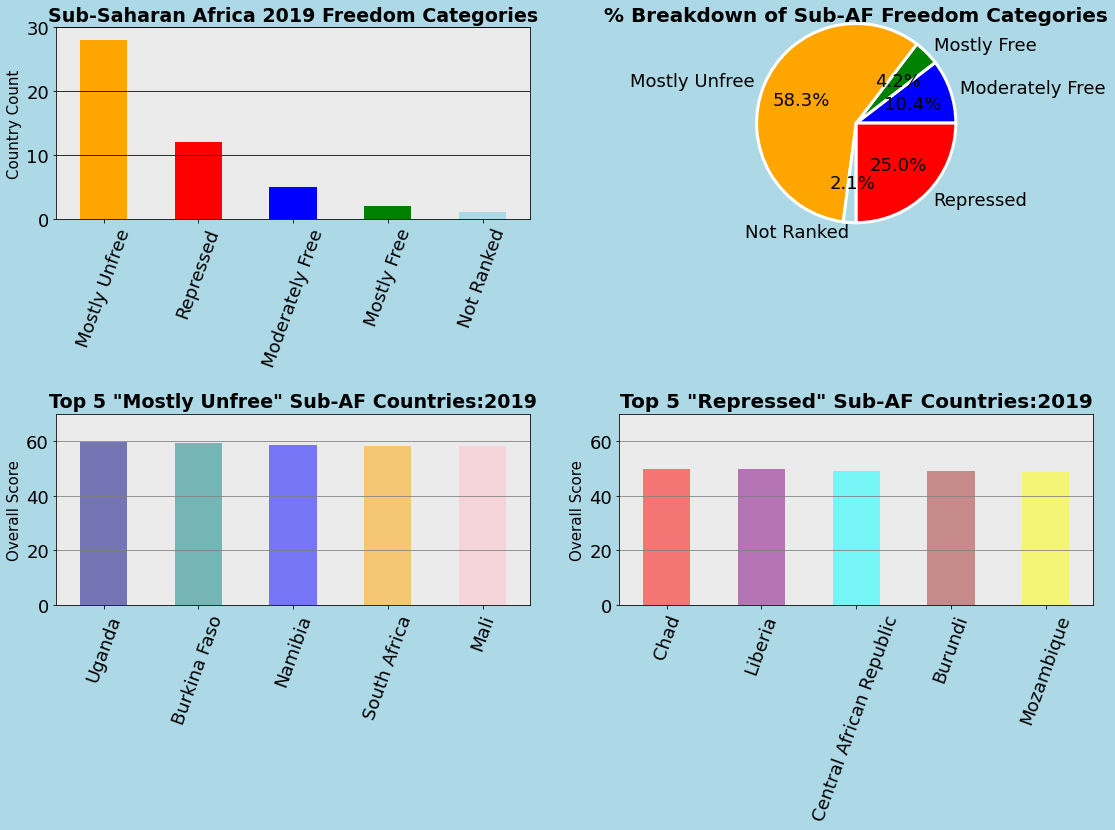

In [374]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(17)
plt.rcParams["figure.facecolor"] = "lightblue"


SubAF_new_df = df19[df19['Region']=="Sub-Saharan Africa"]
SubAF_df = SubAF_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
SubAF_sorted = SubAF_df.sort_values('CountryID', ascending = False)
SubAF_sorted.plot('Bucket Category', 'CountryID', kind='bar',ax=axs1,rot=70, fontsize = 18, legend = None, color = ('orange', 'red', 'blue', 'green','lightblue'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("Sub-Saharan Africa 2019 Freedom Categories", fontsize = 19, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 30])

labels = ['Moderately Free','Mostly Free','Mostly Unfree','Not Ranked','Repressed']
colors = ['blue', 'green', 'orange', 'lightblue', 'red']
SubAF_new_df = df19[df19['Region']=="Sub-Saharan Africa"]
SubAF_cat = SubAF_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
SubAF_cat.plot(y = 'CountryID', labels = labels, colors = colors,legend = None,kind='pie',ax=axs2, fontsize = 18,autopct='%.1f%%',radius = 1.3, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
axs2.set_title("% Breakdown of Sub-AF Freedom Categories", fontsize=20, fontweight='bold')
axs2.set(ylabel='')

SubAF_new_df = df19[df19['Region']=="Sub-Saharan Africa"]
SubAFbc_new_df = SubAF_new_df[SubAF_new_df['Bucket Category']=="Mostly Unfree"]
SubAFname_df = SubAFbc_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
SubAFname_sorted = SubAFname_df.sort_values('Overall Score', ascending = False).head(5)
SubAFname_sorted.plot('Country Name', 'Overall Score',kind='bar', ax=axs3, rot=70, fontsize = 18, legend = None, alpha = 0.5, color = ('navy','teal','blue','orange', 'pink'))
axs3.set_xlabel('')
axs3.set_ylabel("Overall Score", fontsize = 15)
axs3.set_title("Top 5 " '"Mostly Unfree"' " Sub-AF Countries:2019", fontsize = 19, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'grey')
axs3.yaxis.grid(True, which='minor', color = 'grey')
axs3.set_ylim([0, 70])

SubAF_new_df = df19[df19['Region']=="Sub-Saharan Africa"]
SubAFrep_new_df = SubAF_new_df[SubAF_new_df['Bucket Category']=="Repressed"]
SubAFrep_df = SubAFrep_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
SubAFrep_sorted = SubAFrep_df.sort_values('Overall Score', ascending = False).head(5)
SubAFrep_sorted.plot('Country Name', 'Overall Score',kind = 'bar', ax=axs4,rot=70, fontsize = 18, legend = None, alpha = 0.5, color = ('red','purple','aqua','brown', 'yellow'))
axs4.set_xlabel('') 
axs4.set_ylabel("Overall Score", fontsize = 15)
axs4.set_title("Top 5 " '"Repressed"' " Sub-AF Countries:2019", fontsize = 20, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'grey')
axs4.yaxis.grid(True, which='minor', color = 'grey')
axs4.set_ylim([0, 70])

plt.tight_layout()

Approximately 60% of countries in Sub-Saharan Africa were classified as "Mostly Unfree" in 2019, followed by the classification of "Repressed"(25%). We saw earlier that Sub-Saharan Africa as a region had the most countries classified as "Mostly Unfree" in 2019. Only 4.2% of countries in this region were classified as "Mostly Free."

The 5 countries of Uganda to Mali represent the countries with the highest overall scores in the "Mostly Unfree" category.

The 5 countries of Chand to Mozambique represent the countries with the highest overall scores in the "Repressed" category.

### The Middle East and North Africa

(20.0, 80.0)

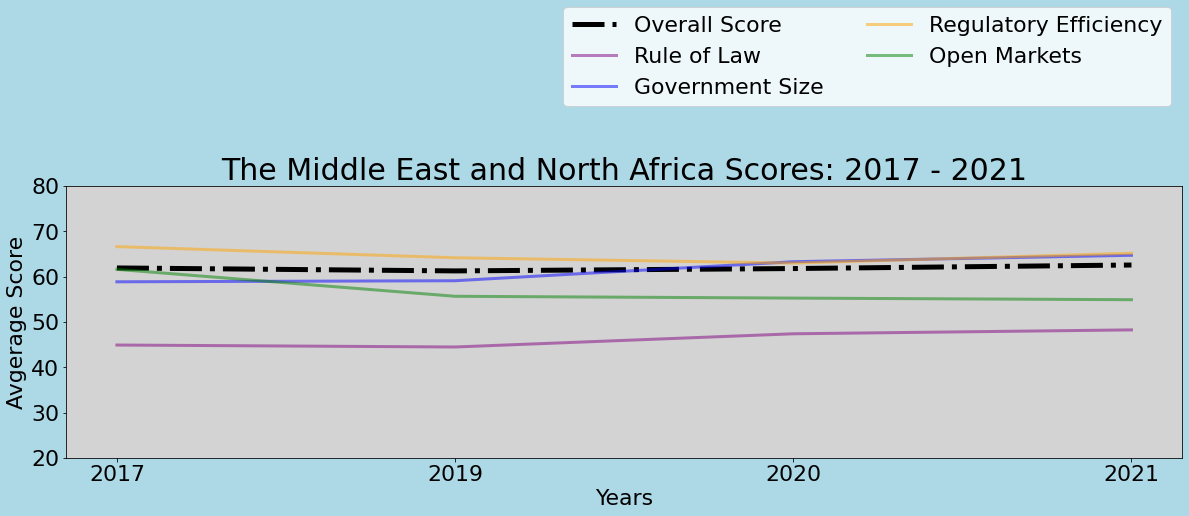

In [391]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

MENAconsolidated = pd.concat([MENA_Score_df, MENA_Rol_df, MENA_Gs_df, MENA_Re_df, MENA_Om_df]).reset_index(drop=True)

plt.plot('Year','Overall Score', data = MENA_Score_df, label = "Overall Score", linewidth = 5.0, linestyle = '-.',color = 'black')
plt.plot('Year','Rule of Law', data = MENA_Rol_df, linewidth = 3.0, color = 'purple', alpha = 0.5)
plt.plot('Year','Government Size', data =MENA_Gs_df, linewidth = 3.0, color = 'blue', alpha = 0.5)
plt.plot('Year','Regulatory Efficiency', data =MENA_Re_df, linewidth = 3.0, color = 'orange', alpha = 0.5)
plt.plot('Year','Open Markets', data = MENA_Om_df, linewidth = 3.0,  color = 'green', alpha = 0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avgerage Score")
plt.title("The Middle East and North Africa Scores: 2017 - 2021", fontsize = 30)
plt.ylim((20,80))

The Middle East and North Africa's (MENA) overall average scores from 2017 - 2021 classifies them as "Moderately Free."

Regulatory Efficiency and Open Markets have seen a slight decline over the 5 year period.

Government Size has increased slightly from 2017.

MENA's Rule of Law score has shown a slight increase over the 5 year period, but still low compared to the other variable's scores.

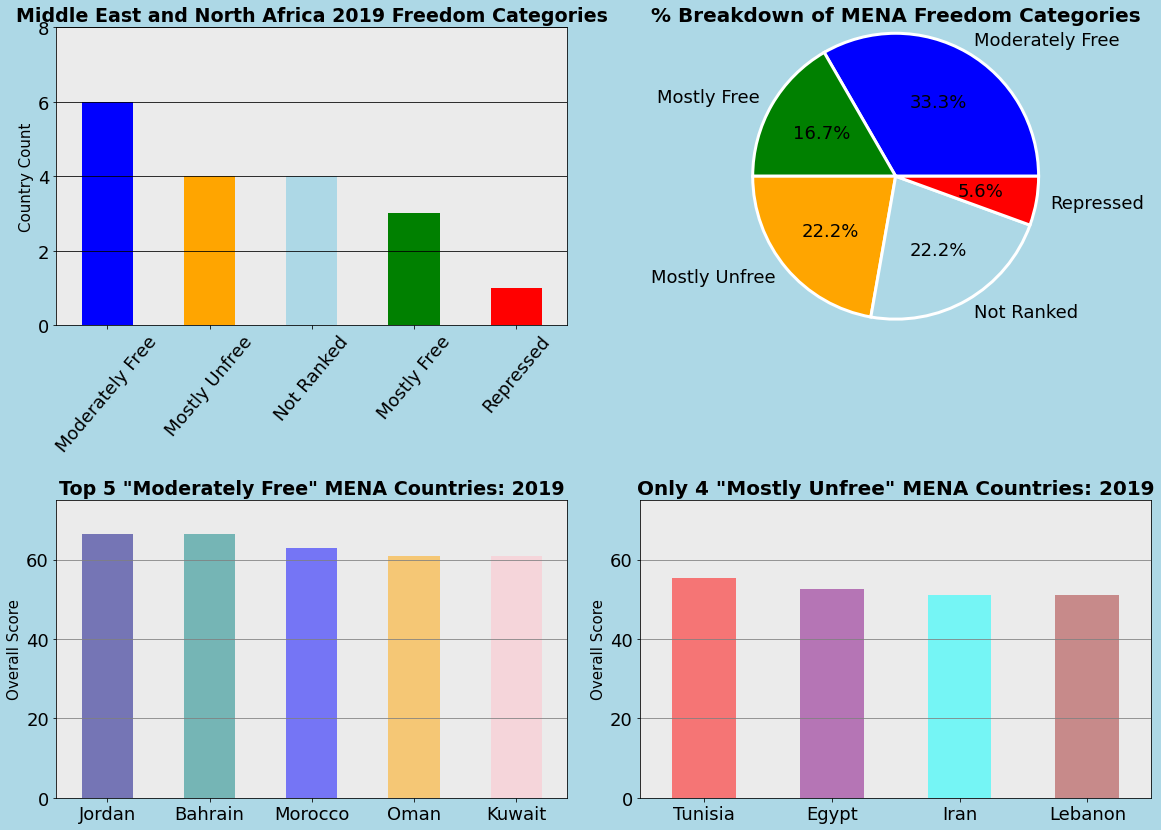

In [375]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(17)
plt.rcParams["figure.facecolor"] = "lightblue"


MENA_new_df = df19[df19['Region']=="Middle East and North Africa"]
MENA_df = MENA_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
MENA_sorted = MENA_df.sort_values('CountryID', ascending = False)
MENA_sorted.plot('Bucket Category', 'CountryID', kind='bar',ax=axs1,rot=50, fontsize = 18, legend = None, color = ('blue', 'orange', 'lightblue', 'green','red'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("Middle East and North Africa 2019 Freedom Categories", fontsize = 19, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 8])

labels = ['Moderately Free','Mostly Free','Mostly Unfree','Not Ranked','Repressed']
colors = ['blue', 'green', 'orange', 'lightblue', 'red']
MENA_new_df = df19[df19['Region']=="Middle East and North Africa"]
MENA_cat = MENA_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
MENA_cat.plot(y = 'CountryID', labels = labels, colors = colors,legend = None,kind='pie',ax=axs2, fontsize = 18,autopct='%.1f%%',radius = 1.2, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
axs2.set_title("% Breakdown of MENA Freedom Categories", fontsize=20, fontweight='bold')
axs2.set(ylabel='')

MENA_new_df = df19[df19['Region']=="Middle East and North Africa"]
MENAbc_new_df = MENA_new_df[MENA_new_df['Bucket Category']=="Moderately Free"]
MENAname_df = MENAbc_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
MENAname_sorted = MENAname_df.sort_values('Overall Score', ascending = False).head(5)
MENAname_sorted.plot('Country Name', 'Overall Score',kind='bar', ax=axs3, rot=0, fontsize = 18, legend = None, alpha = 0.5, color = ('navy','teal','blue','orange', 'pink'))
axs3.set_xlabel('')
axs3.set_ylabel("Overall Score", fontsize = 15)
axs3.set_title("Top 5 " '"Moderately Free"' " MENA Countries: 2019", fontsize = 19, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'grey')
axs3.yaxis.grid(True, which='minor', color = 'grey')
axs3.set_ylim([0, 75])

MENA_new_df = df19[df19['Region']=="Middle East and North Africa"]
MENAmu_new_df = MENA_new_df[MENA_new_df['Bucket Category']=="Mostly Unfree"]
MENAmu_df = MENAmu_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
MENAmu_sorted = MENAmu_df.sort_values('Overall Score', ascending = False).head(5)
MENAmu_sorted.plot('Country Name', 'Overall Score',kind = 'bar', ax=axs4,rot=0, fontsize = 18, legend = None, alpha = 0.5, color = ('red','purple','aqua','brown', 'yellow'))
axs4.set_xlabel('') 
axs4.set_ylabel("Overall Score", fontsize = 15)
axs4.set_title("Only 4 " '"Mostly Unfree"' " MENA Countries: 2019", fontsize = 20, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'grey')
axs4.yaxis.grid(True, which='minor', color = 'grey')
axs4.set_ylim([0, 75])

plt.tight_layout()


Approximately 33% of countries in the Middle East and North Africa were classified as "Moderately Free" in 2019.  "Mostly Unfree" and "Not Ranked" countries tied for 2nd place at 22%. The countries classified as "Not Ranked" were Iraq, Libya, Syria, and Yemen.

Jordan had the highest score in the "Moderately Free" category and Tunisia had the highest score in the "Mostly Unfree" category in 2019.


### The Americas

(20.0, 80.0)

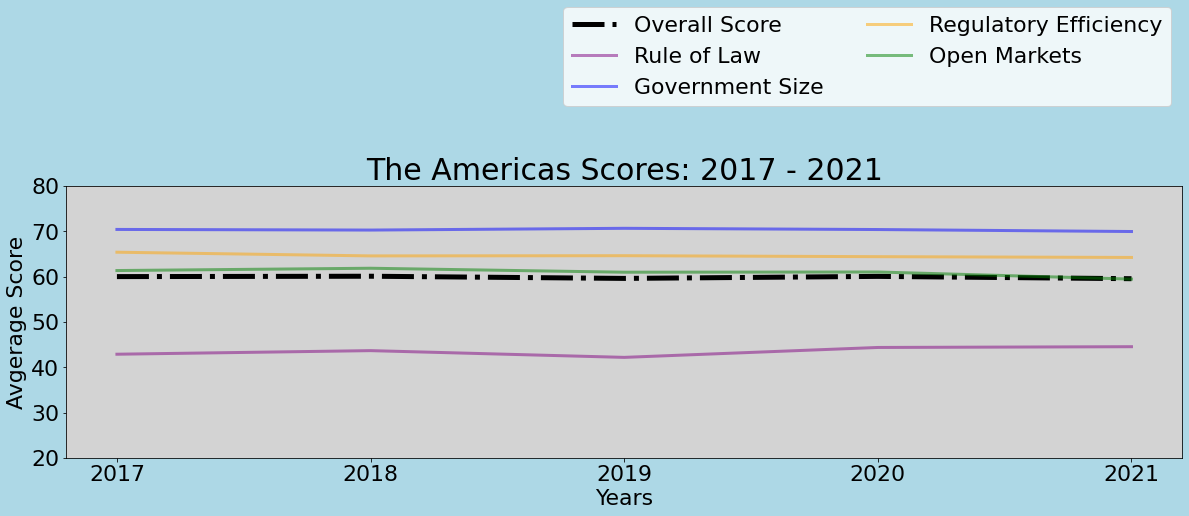

In [392]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

AMERconsolidated = pd.concat([AMER_Score_df, AMER_Rol_df, AMER_Gs_df, AMER_Re_df, AMER_Om_df]).reset_index(drop=True)

plt.plot('Year','Overall Score', data = AMER_Score_df, label = "Overall Score", linewidth = 5.0, linestyle = '-.',color = 'black')
plt.plot('Year','Rule of Law', data = AMER_Rol_df, linewidth = 3.0, color = 'purple', alpha = 0.5)
plt.plot('Year','Government Size', data =AMER_Gs_df, linewidth = 3.0, color = 'blue', alpha = 0.5)
plt.plot('Year','Regulatory Efficiency', data =AMER_Re_df, linewidth = 3.0, color = 'orange', alpha = 0.5)
plt.plot('Year','Open Markets', data = AMER_Om_df, linewidth = 3.0,  color = 'green', alpha = 0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avgerage Score")
plt.title("The Americas Scores: 2017 - 2021", fontsize = 30)
plt.ylim((20,80))


The Americas overall score has classified them as "Moderately Free" from 2017 - 2021.

The Americas have had a very high and stable Government Size score from 2017 - 2021.

The region's Regulatory Efficiency and Open Market scores have also remained stable and above the average overall score.

The Rule of Law score has remained low for the 5 year period and indicates this may be an area for improvement.

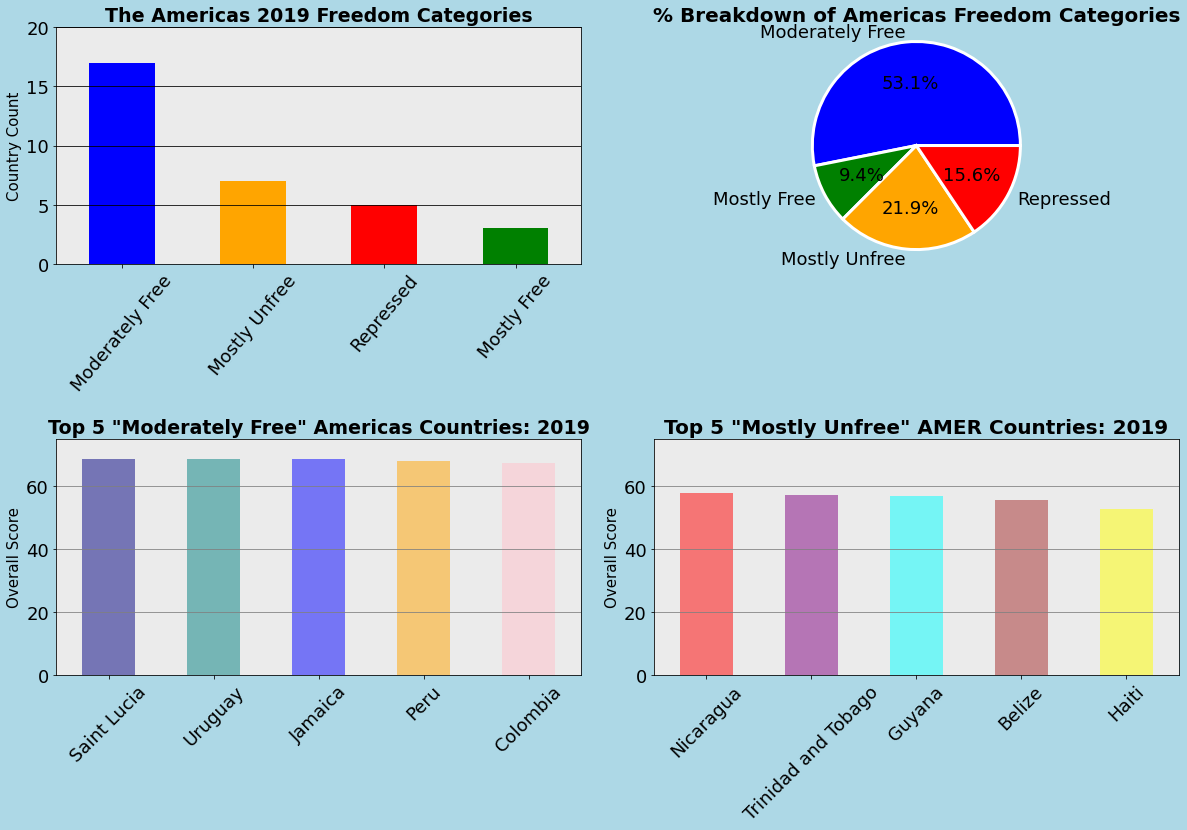

In [376]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(17)
plt.rcParams["figure.facecolor"] = "lightblue"

AMER_new_df = df19[df19['Region']=="Americas"]
AMER_df = AMER_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
AMER_sorted = AMER_df.sort_values('CountryID', ascending = False)
AMER_sorted.plot('Bucket Category', 'CountryID', kind='bar',ax=axs1,rot=50, fontsize = 18, legend = None, color = ('blue', 'orange', 'red', 'green','green'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("The Americas 2019 Freedom Categories", fontsize = 19, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 20])

labels = ['Moderately Free','Mostly Free','Mostly Unfree','Repressed']
colors = ['blue', 'green', 'orange', 'red', 'navy']
AMER_new_df = df19[df19['Region']=="Americas"]
AMER_cat = AMER_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
AMER_cat.plot(y = 'CountryID', labels = labels, colors = colors,legend = None,kind='pie',ax=axs2, fontsize = 18,autopct='%.1f%%',radius = 1.1, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
axs2.set_title("% Breakdown of Americas Freedom Categories", fontsize=20, fontweight='bold')
axs2.set(ylabel='')

AMER_new_df = df19[df19['Region']=="Americas"]
AMERbc_new_df = AMER_new_df[AMER_new_df['Bucket Category']=="Moderately Free"]
AMERname_df = AMERbc_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
AMERname_sorted = AMERname_df.sort_values('Overall Score', ascending = False).head(5)
AMERname_sorted.plot('Country Name', 'Overall Score',kind='bar', ax=axs3, rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('navy','teal','blue','orange', 'pink'))
axs3.set_xlabel('')
axs3.set_ylabel("Overall Score", fontsize = 15)
axs3.set_title("Top 5 " '"Moderately Free"' " Americas Countries: 2019", fontsize = 19, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'grey')
axs3.yaxis.grid(True, which='minor', color = 'grey')
axs3.set_ylim([0, 75])

AMER_new_df = df19[df19['Region']=="Americas"]
AMERmu_new_df = AMER_new_df[AMER_new_df['Bucket Category']=="Mostly Unfree"]
AMERmu_df = AMERmu_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
AMERmu_sorted = AMERmu_df.sort_values('Overall Score', ascending = False).head(5)
AMERmu_sorted.plot('Country Name', 'Overall Score',kind = 'bar', ax=axs4,rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('red','purple','aqua','brown', 'yellow'))
axs4.set_xlabel('') 
axs4.set_ylabel("Overall Score", fontsize = 15)
axs4.set_title("Top 5 " '"Mostly Unfree"' " AMER Countries: 2019", fontsize = 20, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'grey')
axs4.yaxis.grid(True, which='minor', color = 'grey')
axs4.set_ylim([0, 75])

plt.tight_layout()


In 2019, over 50% of countries in the Americas were classified as "Moderately Free" followed by "Mostly Unfree" at 21.9%.  

No countries in the Americas were classified as "Free" in 2019 - Both Canada and the United States had overall scores that classified them as "Mostly Free." Canada ranked 1st regionally and 8th in the world in 2019. The United States ranked 2nd regionally but 12th in the world.

Saint Lucia had the highest overall score in the "Moderately Free" category and Nicaragua had the highest overall score in the "Mostly Unfree" category.



### Europe

(20.0, 80.0)

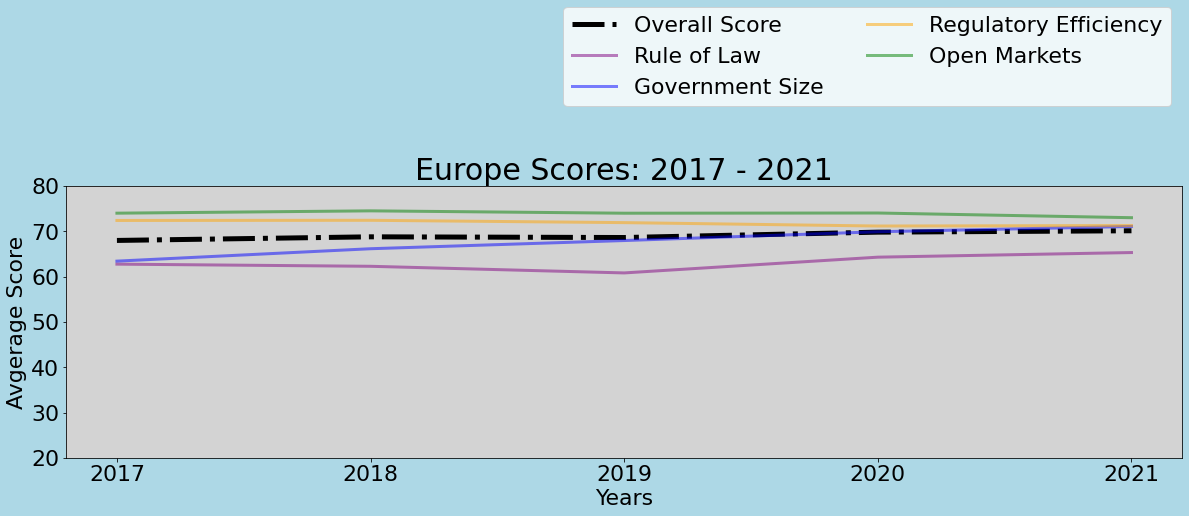

In [393]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

EURconsolidated = pd.concat([EUR_Score_df, EUR_Rol_df, EUR_Gs_df, EUR_Re_df, EUR_Om_df]).reset_index(drop=True)

plt.plot('Year','Overall Score', data = EUR_Score_df, label = "Overall Score", linewidth = 5.0, linestyle = '-.',color = 'black')
plt.plot('Year','Rule of Law', data = EUR_Rol_df, linewidth = 3.0, color = 'purple', alpha = 0.5)
plt.plot('Year','Government Size', data =EUR_Gs_df, linewidth = 3.0, color = 'blue', alpha = 0.5)
plt.plot('Year','Regulatory Efficiency', data =EUR_Re_df, linewidth = 3.0, color = 'orange', alpha = 0.5)
plt.plot('Year','Open Markets', data = EUR_Om_df, linewidth = 3.0,  color = 'green', alpha = 0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avgerage Score")
plt.title("Europe Scores: 2017 - 2021", fontsize = 30)
plt.ylim((20,80))

Europe's average overall scores from 2017 - 2021 has classified them as "Mostly Free," they are the only region to have this classification as a whole.

Europe has consistently had the highest scores for Rule of Law, Government Size, Regulatory Efficiency, and Open Markets of any region.

From 2017 - 2021, their Regulatory Efficiency and Open Market scores have remained constant and above their average overall score.

Government Size has shown an upward trend from 2017.

Rule of Law dipped slightly in 2019 with a slight increase after that.

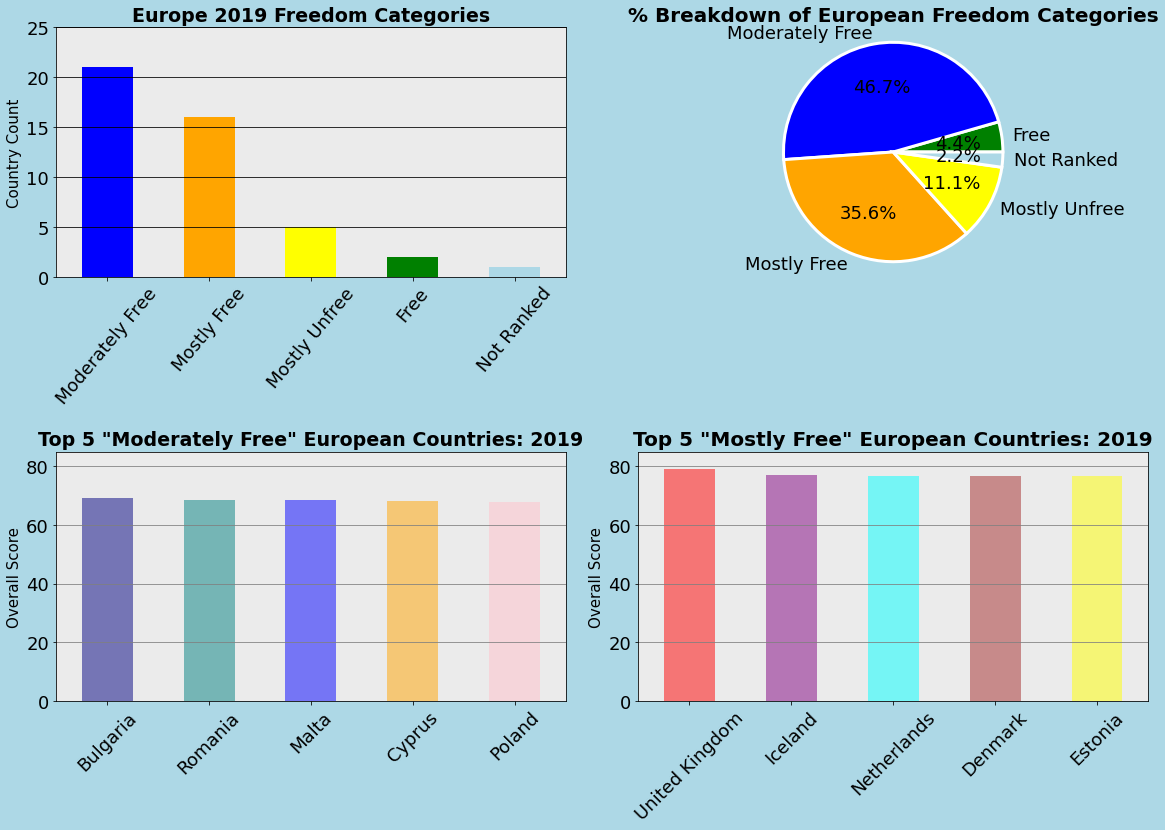

In [377]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(17)
plt.rcParams["figure.facecolor"] = "lightblue"

EUR_new_df = df19[df19['Region']=="Europe"]
EUR_df = EUR_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
EUR_sorted = EUR_df.sort_values('CountryID', ascending = False)
EUR_sorted.plot('Bucket Category', 'CountryID', kind='bar',ax=axs1,rot=50, fontsize = 18, legend = None, color = ('blue', 'orange', 'yellow', 'green','lightblue'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("Europe 2019 Freedom Categories", fontsize = 19, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 25])

labels = ['Free','Moderately Free','Mostly Free','Mostly Unfree', 'Not Ranked']
colors = ['green', 'blue', 'orange', 'yellow', 'lightblue']
EUR_new_df = df19[df19['Region']=="Europe"]
EUR_cat = EUR_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
EUR_cat.plot(y = 'CountryID', labels = labels, colors = colors,legend = None,kind='pie',ax=axs2, fontsize = 18,autopct='%.1f%%',radius = 1.1, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
axs2.set_title("% Breakdown of European Freedom Categories", fontsize=20, fontweight='bold')
axs2.set(ylabel='')

EUR_new_df = df19[df19['Region']=="Europe"]
EURbc_new_df = EUR_new_df[EUR_new_df['Bucket Category']=="Moderately Free"]
EURname_df = EURbc_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
EURname_sorted = EURname_df.sort_values('Overall Score', ascending = False).head(5)
EURname_sorted.plot('Country Name', 'Overall Score',kind='bar', ax=axs3, rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('navy','teal','blue','orange', 'pink'))
axs3.set_xlabel('')
axs3.set_ylabel("Overall Score", fontsize = 15)
axs3.set_title("Top 5 " '"Moderately Free"' " European Countries: 2019", fontsize = 19, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'grey')
axs3.yaxis.grid(True, which='minor', color = 'grey')
axs3.set_ylim([0, 85])

EUR_new_df = df19[df19['Region']=="Europe"]
EURmf_new_df = EUR_new_df[EUR_new_df['Bucket Category']=="Mostly Free"]
EURmf_df = EURmf_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
EURmf_sorted = EURmf_df.sort_values('Overall Score', ascending = False).head(5)
EURmf_sorted.plot('Country Name', 'Overall Score',kind = 'bar', ax=axs4,rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('red','purple','aqua','brown', 'yellow'))
axs4.set_xlabel('') 
axs4.set_ylabel("Overall Score", fontsize = 15)
axs4.set_title("Top 5 " '"Mostly Free"' " European Countries: 2019", fontsize = 20, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'grey')
axs4.yaxis.grid(True, which='minor', color = 'grey')
axs4.set_ylim([0, 85])

plt.tight_layout()

In 2019, approximately 82% of European countries had a 'free' classification, the most of any region. Almost 50% of countries were classified as "Moderately Free," with the next largest category being "Mostly Free" at approximately 35.6%.

Europe was one of only two regions to have countries classified as "Free" in 2019, which were Ireland and Switzerland.

Europe was the only region to have no countries classified as "Repressed" in 2019.

Bulgaria topped the charts with their overall score for the "Moderately Free" category and the United Kingdom had the highest overall score within the "Mostly Free" category.

### Asia-Pacific

(20.0, 80.0)

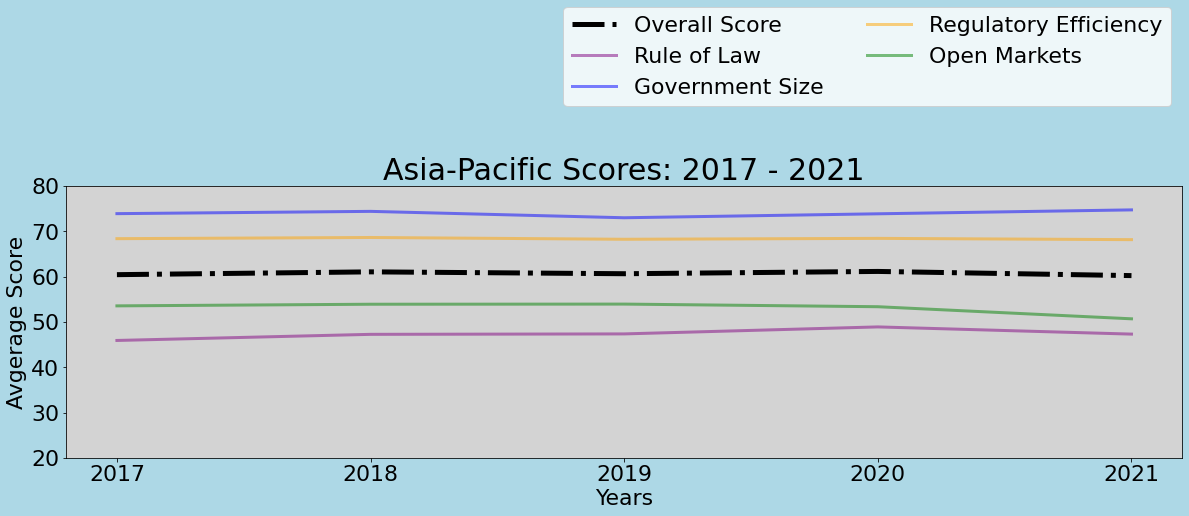

In [394]:
plt.rcParams["figure.facecolor"] = "lightblue"
ax = plt.axes()
ax.set_facecolor("lightgrey")

APACconsolidated = pd.concat([APAC_Score_df, APAC_Rol_df, APAC_Gs_df, APAC_Re_df, APAC_Om_df]).reset_index(drop=True)

plt.plot('Year','Overall Score', data = APAC_Score_df, label = "Overall Score", linewidth = 5.0, linestyle = '-.',color = 'black')
plt.plot('Year','Rule of Law', data = APAC_Rol_df, linewidth = 3.0, color = 'purple', alpha = 0.5)
plt.plot('Year','Government Size', data =APAC_Gs_df, linewidth = 3.0, color = 'blue', alpha = 0.5)
plt.plot('Year','Regulatory Efficiency', data =APAC_Re_df, linewidth = 3.0, color = 'orange', alpha = 0.5)
plt.plot('Year','Open Markets', data = APAC_Om_df, linewidth = 3.0,  color = 'green', alpha = 0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.7), ncol=2)
plt.xlabel("Years")
plt.ylabel("Avgerage Score")
plt.title("Asia-Pacific Scores: 2017 - 2021", fontsize = 30)
plt.ylim((20,80))

Asia-Pacific's (APAC) overall score from 2017 - 2021 shows that the region is "Moderately Free." 

APAC's Government Size score is high, indicating that as a whole, the region has large governments.

APAC's Regulatory Efficiency score has been consistently high over the 5 year period.

With consistently low scores over the 5 year period, Rule of Law and Open Markets are areas that could be improved. 

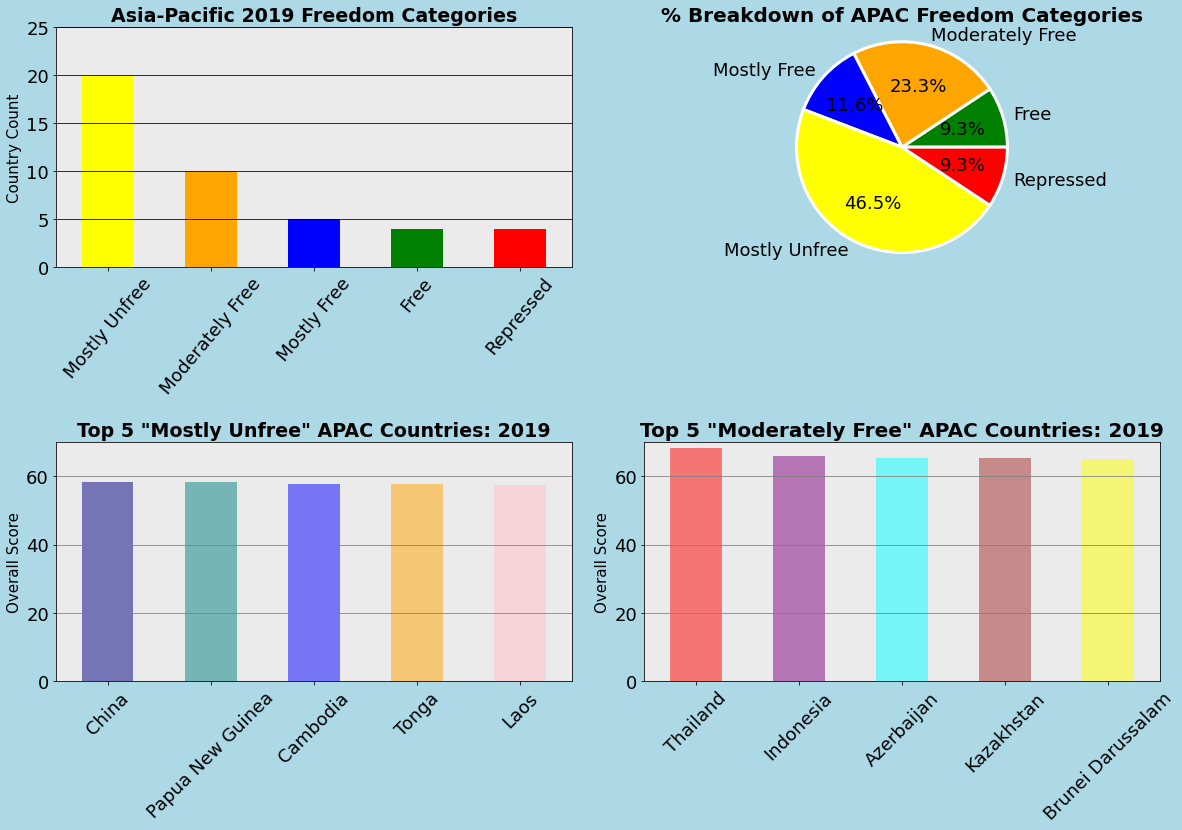

In [378]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(17)
plt.rcParams["figure.facecolor"] = "lightblue"

APAC_new_df = df19[df19['Region']=="Asia-Pacific"]
APAC_df = APAC_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
APAC_sorted = APAC_df.sort_values('CountryID', ascending = False)
APAC_sorted.plot('Bucket Category', 'CountryID', kind='bar',ax=axs1,rot=50, fontsize = 18, legend = None, color = ('yellow', 'orange', 'blue', 'green','red'))
axs1.set_xlabel('')
axs1.set_ylabel("Country Count", fontsize = 15)
axs1.set_title("Asia-Pacific 2019 Freedom Categories", fontsize = 19, fontweight='bold')
axs1.set_facecolor('#EBEBEB')
axs1.yaxis.grid(True, which='major', color = 'black')
axs1.yaxis.grid(True, which='minor', color = 'black')
axs1.set_ylim([0, 25])

labels = ['Free','Moderately Free','Mostly Free','Mostly Unfree', 'Repressed']
colors = ['green', 'orange', 'blue', 'yellow', 'red']
APAC_new_df = df19[df19['Region']=="Asia-Pacific"]
APAC_cat = APAC_new_df.groupby('Bucket Category').agg({'CountryID':'count'}).reset_index()
APAC_cat.plot(y = 'CountryID', labels = labels, colors = colors,legend = None,kind='pie',ax=axs2, fontsize = 18,autopct='%.1f%%',radius = 1.1, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'large'}) 
axs2.set_title("% Breakdown of APAC Freedom Categories", fontsize=20, fontweight='bold')
axs2.set(ylabel='')

APAC_new_df = df19[df19['Region']=="Asia-Pacific"]
APACbc_new_df = APAC_new_df[APAC_new_df['Bucket Category']=="Mostly Unfree"]
APACname_df = APACbc_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
APACname_sorted = APACname_df.sort_values('Overall Score', ascending = False).head(5)
APACname_sorted.plot('Country Name', 'Overall Score',kind='bar', ax=axs3, rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('navy','teal','blue','orange', 'pink'))
axs3.set_xlabel('')
axs3.set_ylabel("Overall Score", fontsize = 15)
axs3.set_title("Top 5 " '"Mostly Unfree"' " APAC Countries: 2019", fontsize = 19, fontweight='bold')
axs3.set_facecolor('#EBEBEB')
axs3.yaxis.grid(True, which='major', color = 'grey')
axs3.yaxis.grid(True, which='minor', color = 'grey')
axs3.set_ylim([0, 70])

APAC_new_df = df19[df19['Region']=="Asia-Pacific"]
APACmf_new_df = APAC_new_df[APAC_new_df['Bucket Category']=="Moderately Free"]
APACmf_df = APACmf_new_df.groupby('Country Name').agg({'Overall Score':'mean'}).reset_index()
APACmf_sorted = APACmf_df.sort_values('Overall Score', ascending = False).head(5)
APACmf_sorted.plot('Country Name', 'Overall Score',kind = 'bar', ax=axs4,rot=45, fontsize = 18, legend = None, alpha = 0.5, color = ('red','purple','aqua','brown', 'yellow'))
axs4.set_xlabel('') 
axs4.set_ylabel("Overall Score", fontsize = 15)
axs4.set_title("Top 5 " '"Moderately Free"' " APAC Countries: 2019", fontsize = 20, fontweight='bold')
axs4.set_facecolor('#EBEBEB')
axs4.yaxis.grid(True, which='major', color = 'grey')
axs4.yaxis.grid(True, which='minor', color = 'grey')
axs4.set_ylim([0, 70])

plt.tight_layout()

Almost 50% of the countries in APAC were classified as "Mostly Unfree" in 2019. This was followed by "Moderately Free" at 23%. 

It is interesting that while Asia-Pacific was one of only two regions to include any countries classified as “Free” in 2019, the majority of their countries were classified as "Mostly Unfree."

China has the highest score in the "Mostly Unfree" category while Thailand has the highest score in the "Moderately Free" category.





# Conclusions

The world as a whole has remained "Moderately Free" from 2017 - 2021.

The Rule of Law(.84), Regulatory Efficiency(.84), and Open Markets(.85) r-squared values indicate that these variables are strongly, positively correlated with a country's improved overall economic freedom. Government Size (.40) is still positively correlated with overall score, but less so than the other 3 variables.

Rule of Law is an area that has had consistently low scores from 2017 - 2021, indicating a need for improvement at the global and regional level.

On a regional level, Europe has shown to consistently be in the best overall economic position from 2017 - 2021, having a strong Rule of Law, high Regulatory Efficiency and Open Markets, and being classified as "Mostly Free." In 2019, Europe had the largest percentage (>80%) of countries with a 'free' classification.

On a regional level, Sub-Saharan Africa's economic position indicates that there is room for improvement. The region had the most countries classified as either "Mostly Unfree" or "Repressed" in 2019 and the region's 5 year overall score classifies them as "Mostly Unfree." On a positive note, in 2019 the Republic of Congo was the country with the number one percentage increase in their overall score, which saw the country increase their world and region rank and improve their classification from 'Repressed' to 'Mostly Unfree.'